<h1><b><u> Michelson Interferometer data from a classical source 

<h5>We measured the visibility of interference fringes as a function of the relative angle between the mirrors in a Michelson interferometer illuminated by a classical (thermal or broadband) light source. The visibility quantifies the contrast between bright and dark fringes and is defined as


\begin{align*}
    V = \dfrac{I_\mathrm{max} - I_\mathrm{min}}{I_\mathrm{max} + I_\mathrm{min}}
\end{align*}
Experimentally, the visibility was extracted from the recorded intensity oscillations for different mirror angles, with associated statistical uncertainties derived from repeated measurements.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
import sys
from scipy.optimize import curve_fit
sys.path.append('../scripts')

from classical_eraser_analysis import VisibilityCalculation
from plotting import f
f()

<h2><u><b> Data with a quarter wave plate (no eraser)

<h5> When a quarter-wave plate was introduced into one arm of the Michelson interferometer, it converted the linearly polarized light into circularly polarized light. As a result, the two beams returning from the interferometer became orthogonally polarized and could no longer interfere coherently.

<h5>
The measured visibility dropped significantly across all mirror angles, indicating the loss of interference due to polarization mismatch. This confirms that interference requires not only spatial and temporal coherence but also identical polarization states between the interfering beams.

<h3><b><u> Running the data through the analysis pipeline

In [2]:
angles = [0, 8, 16, 24, 32, 40, 45, 48, 56, 64, 72, 80, 90]
visibilities = []
std_visibilities = []

for angle in [0, 8, 16, 24, 32, 40, 45, 48, 56, 64, 72, 80, 90]:
    vis = VisibilityCalculation(f'../data/classical no eraser/{angle}degrees.csv', distance = 43, prominence=0.2e-5)
    #vis.run_diagnostic_plot()
    visibilities.append(vis.get_visibility()[0])
    std_visibilities.append(vis.get_visibility()[1])
    #print(f'Angle: {angle}, Visibility: {vis.get_visibility()}')

<h5> Plotting the analyzed data to check for correct analysis

Text(0.5, 1.0, 'Visibility vs Angle without Quantum Eraser')

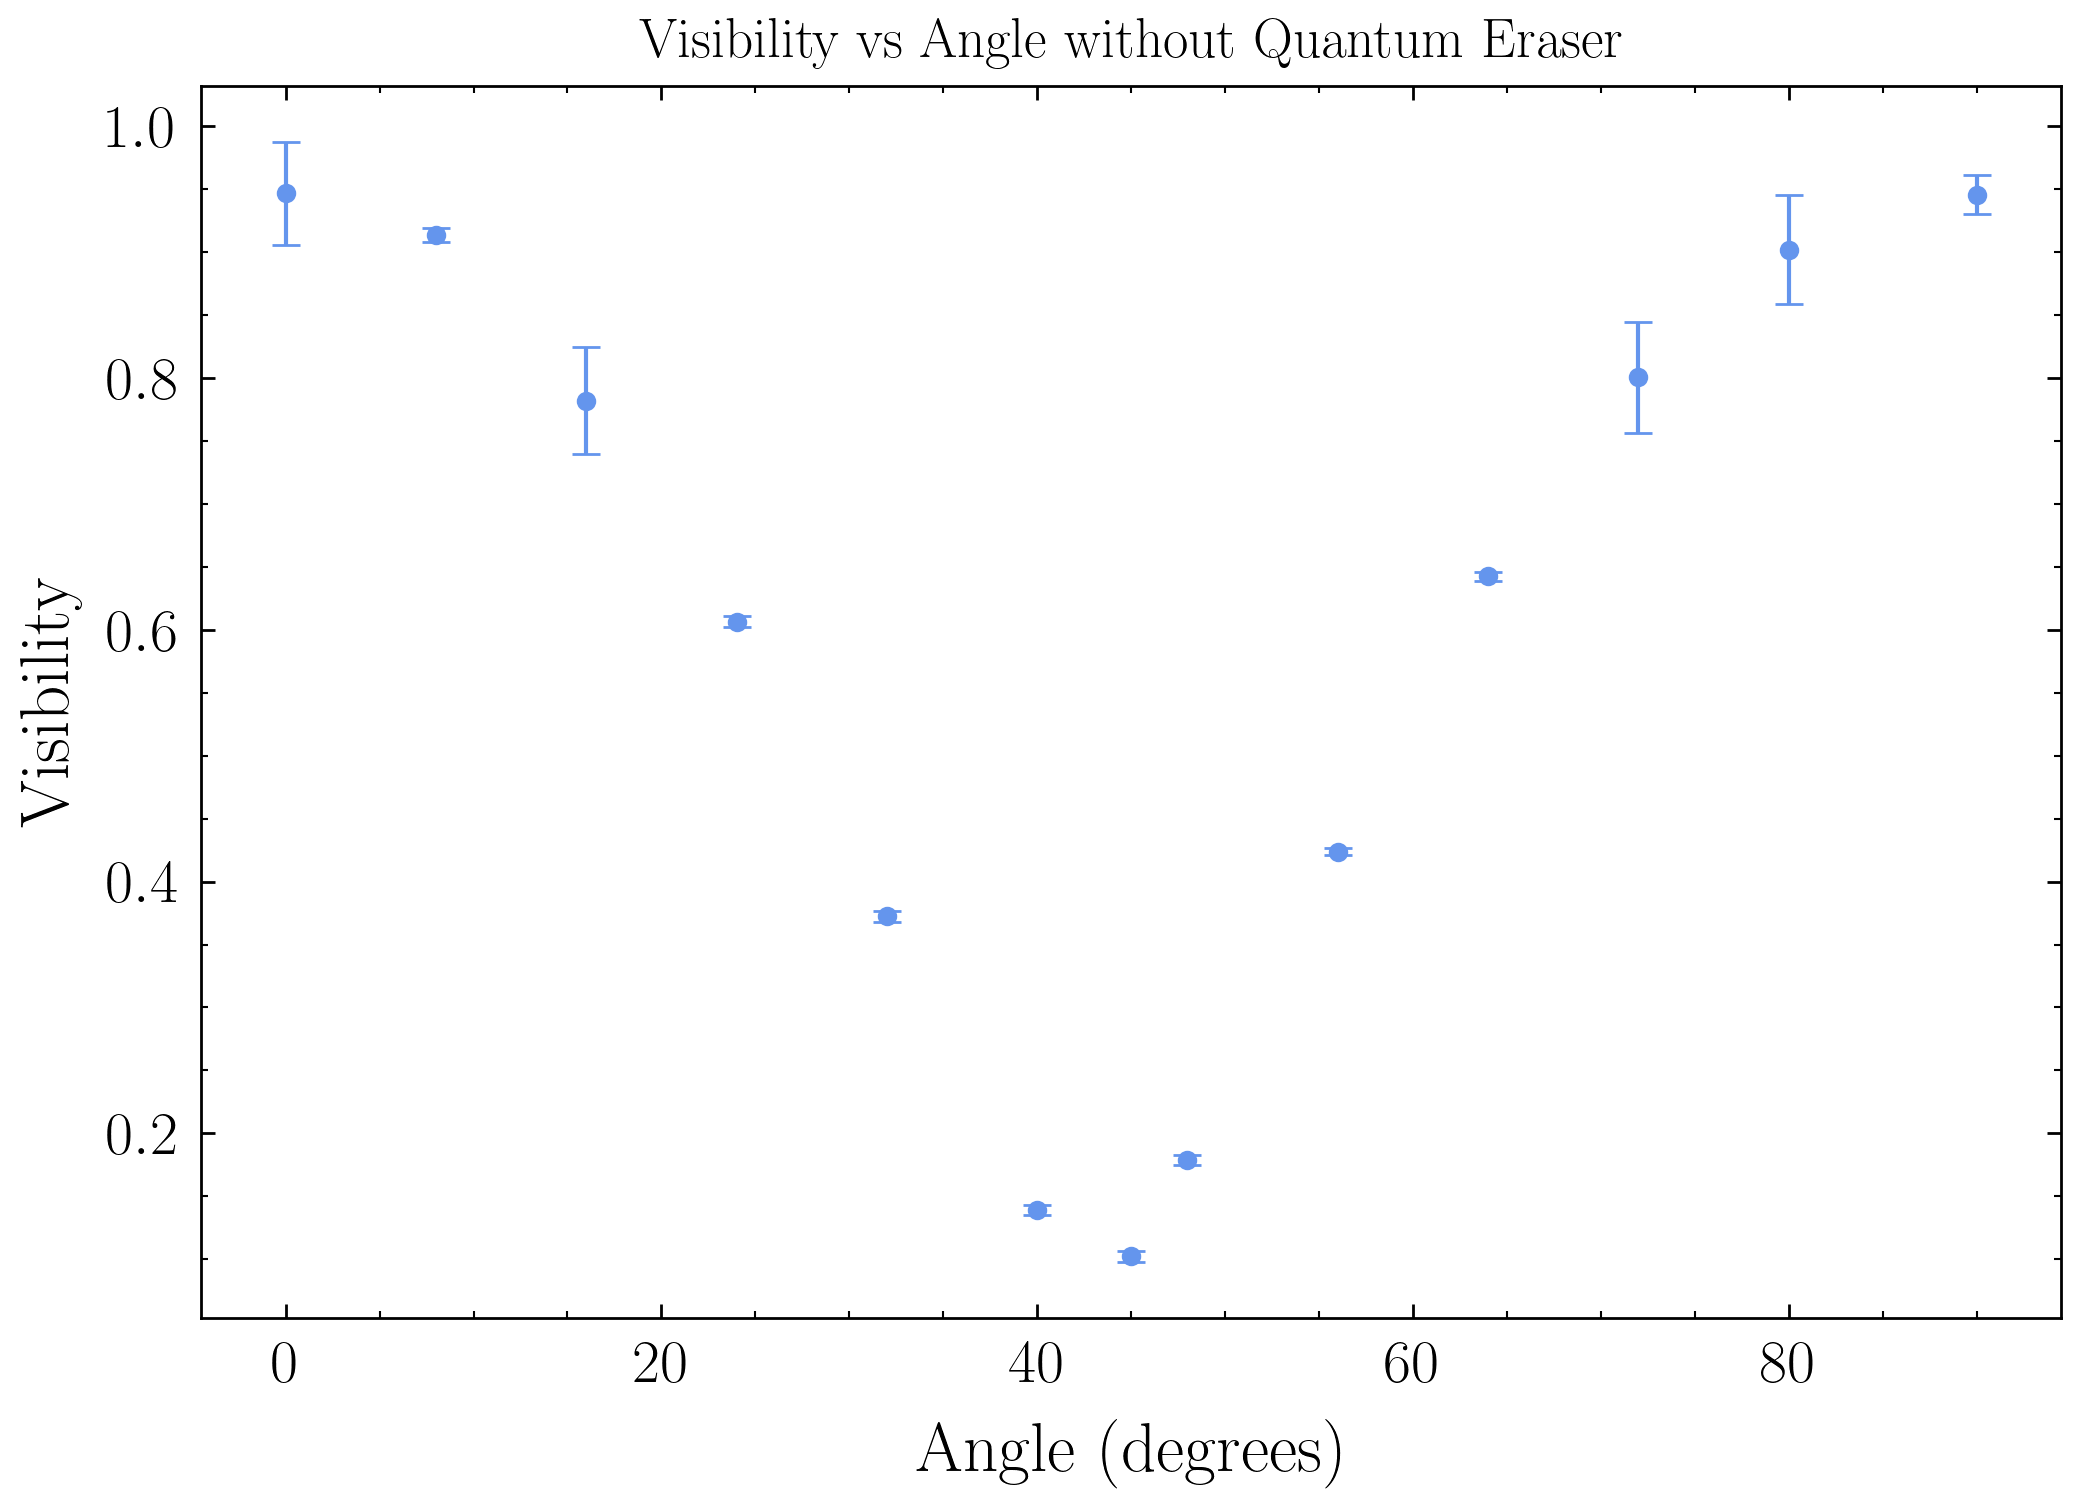

In [3]:
plt.errorbar(angles, visibilities, yerr=std_visibilities, fmt='o', capsize=5)
plt.xlabel('Angle (degrees)')
plt.ylabel('Visibility')
plt.title('Visibility vs Angle without Quantum Eraser', fontsize = 20)

<h5> Clearly, the errorbars are too large for some of the data points reanalyzing those data points

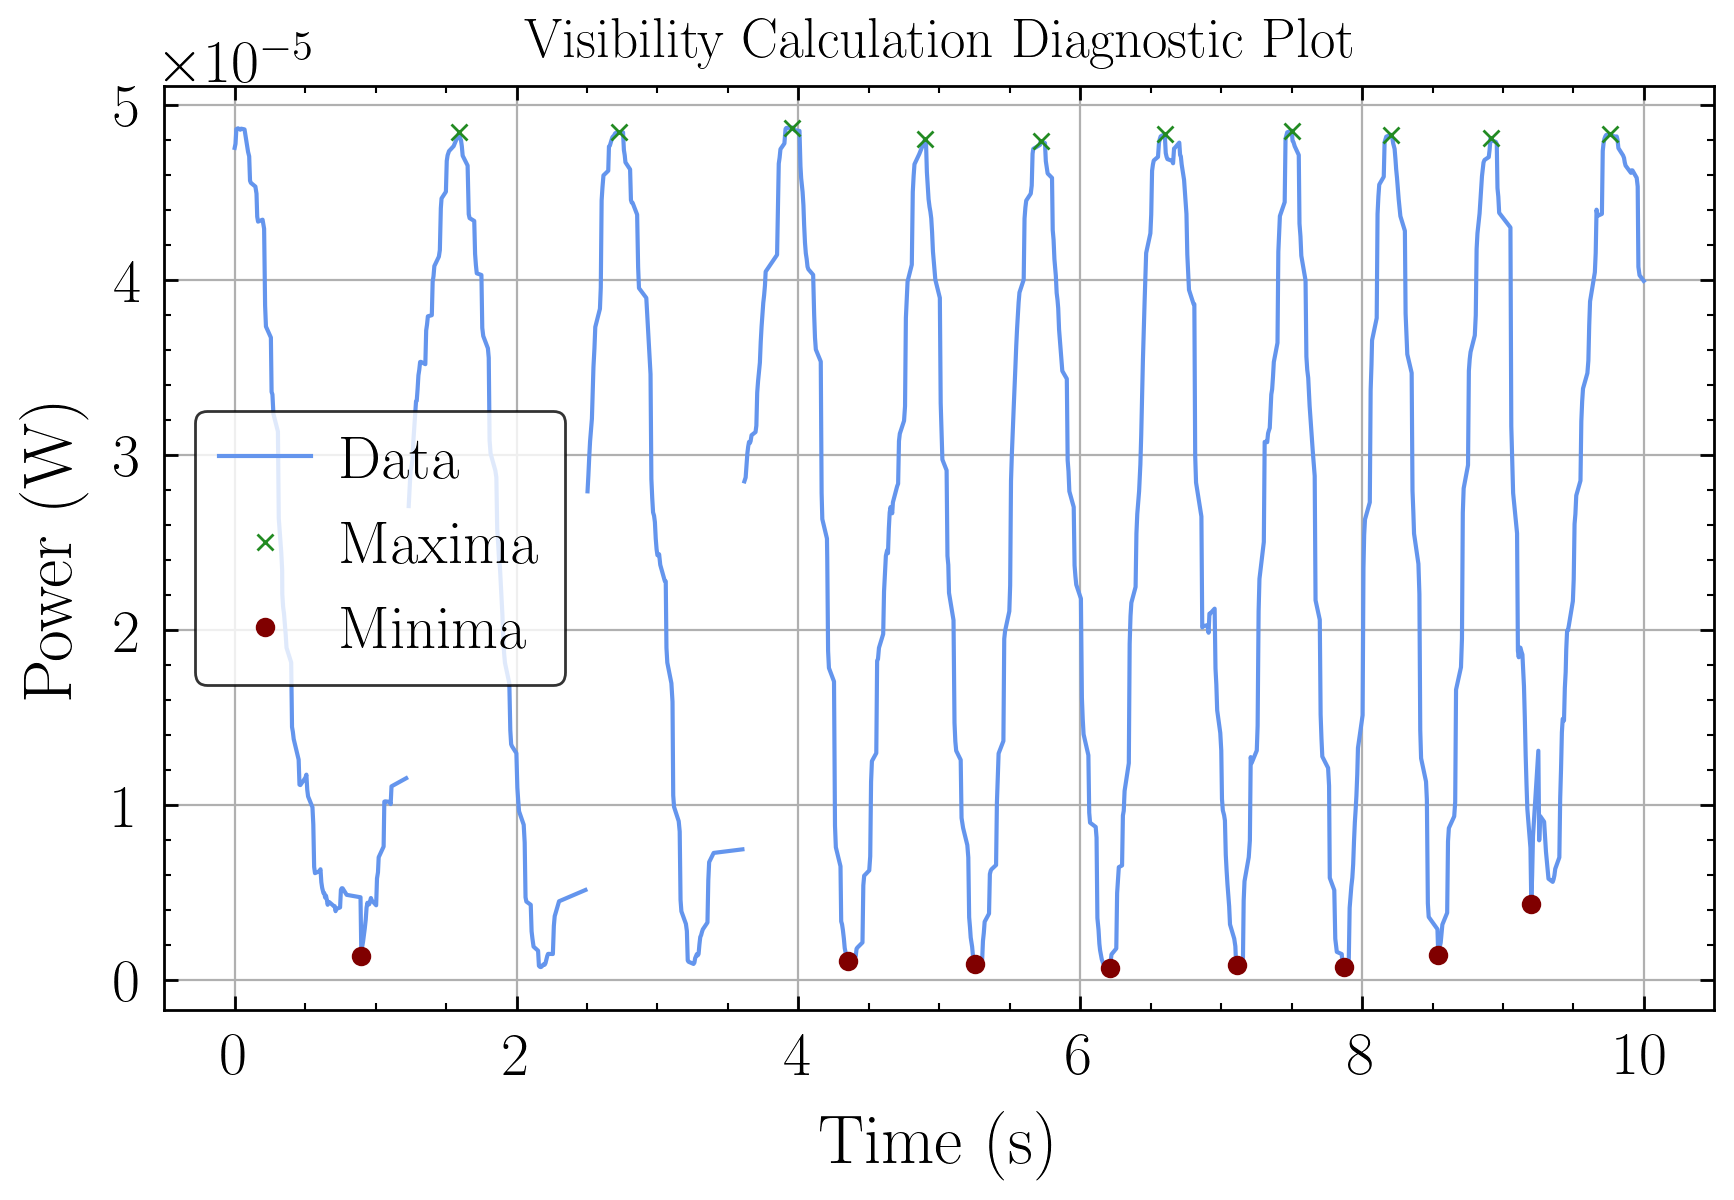

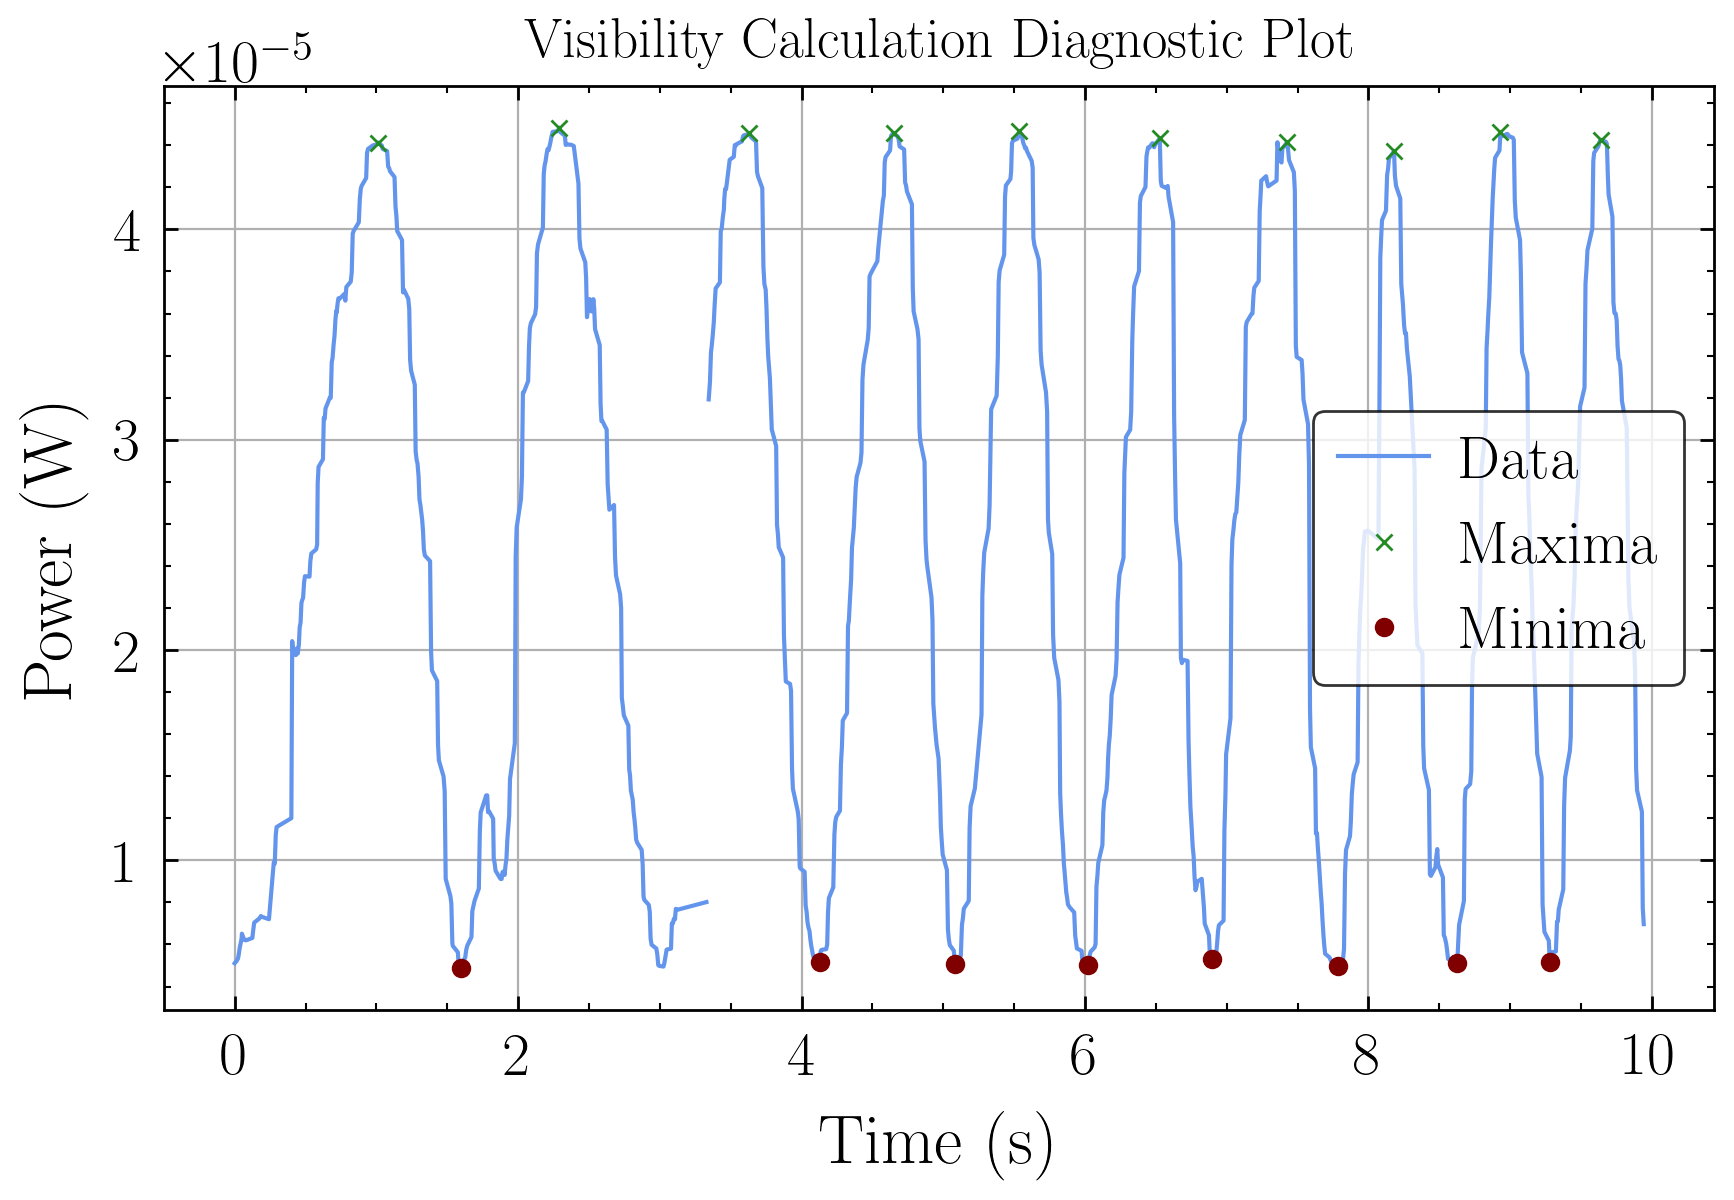

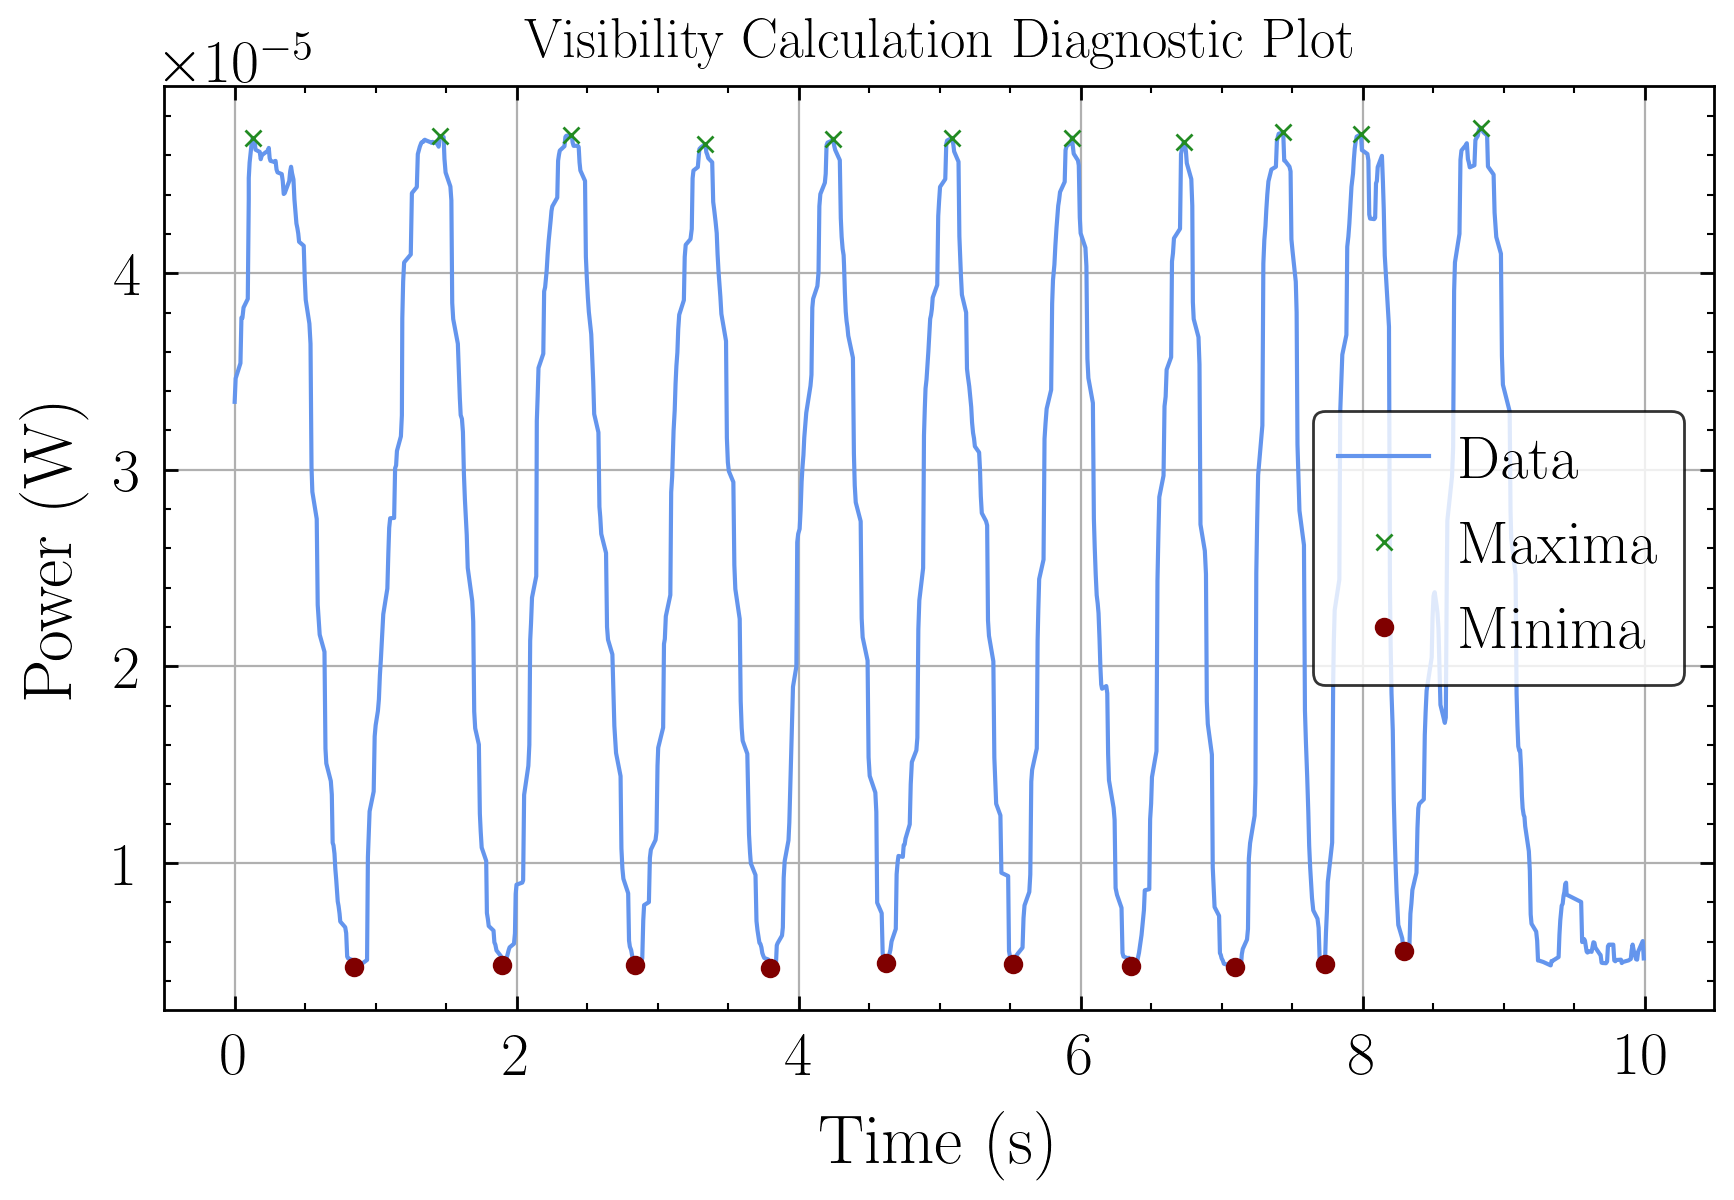

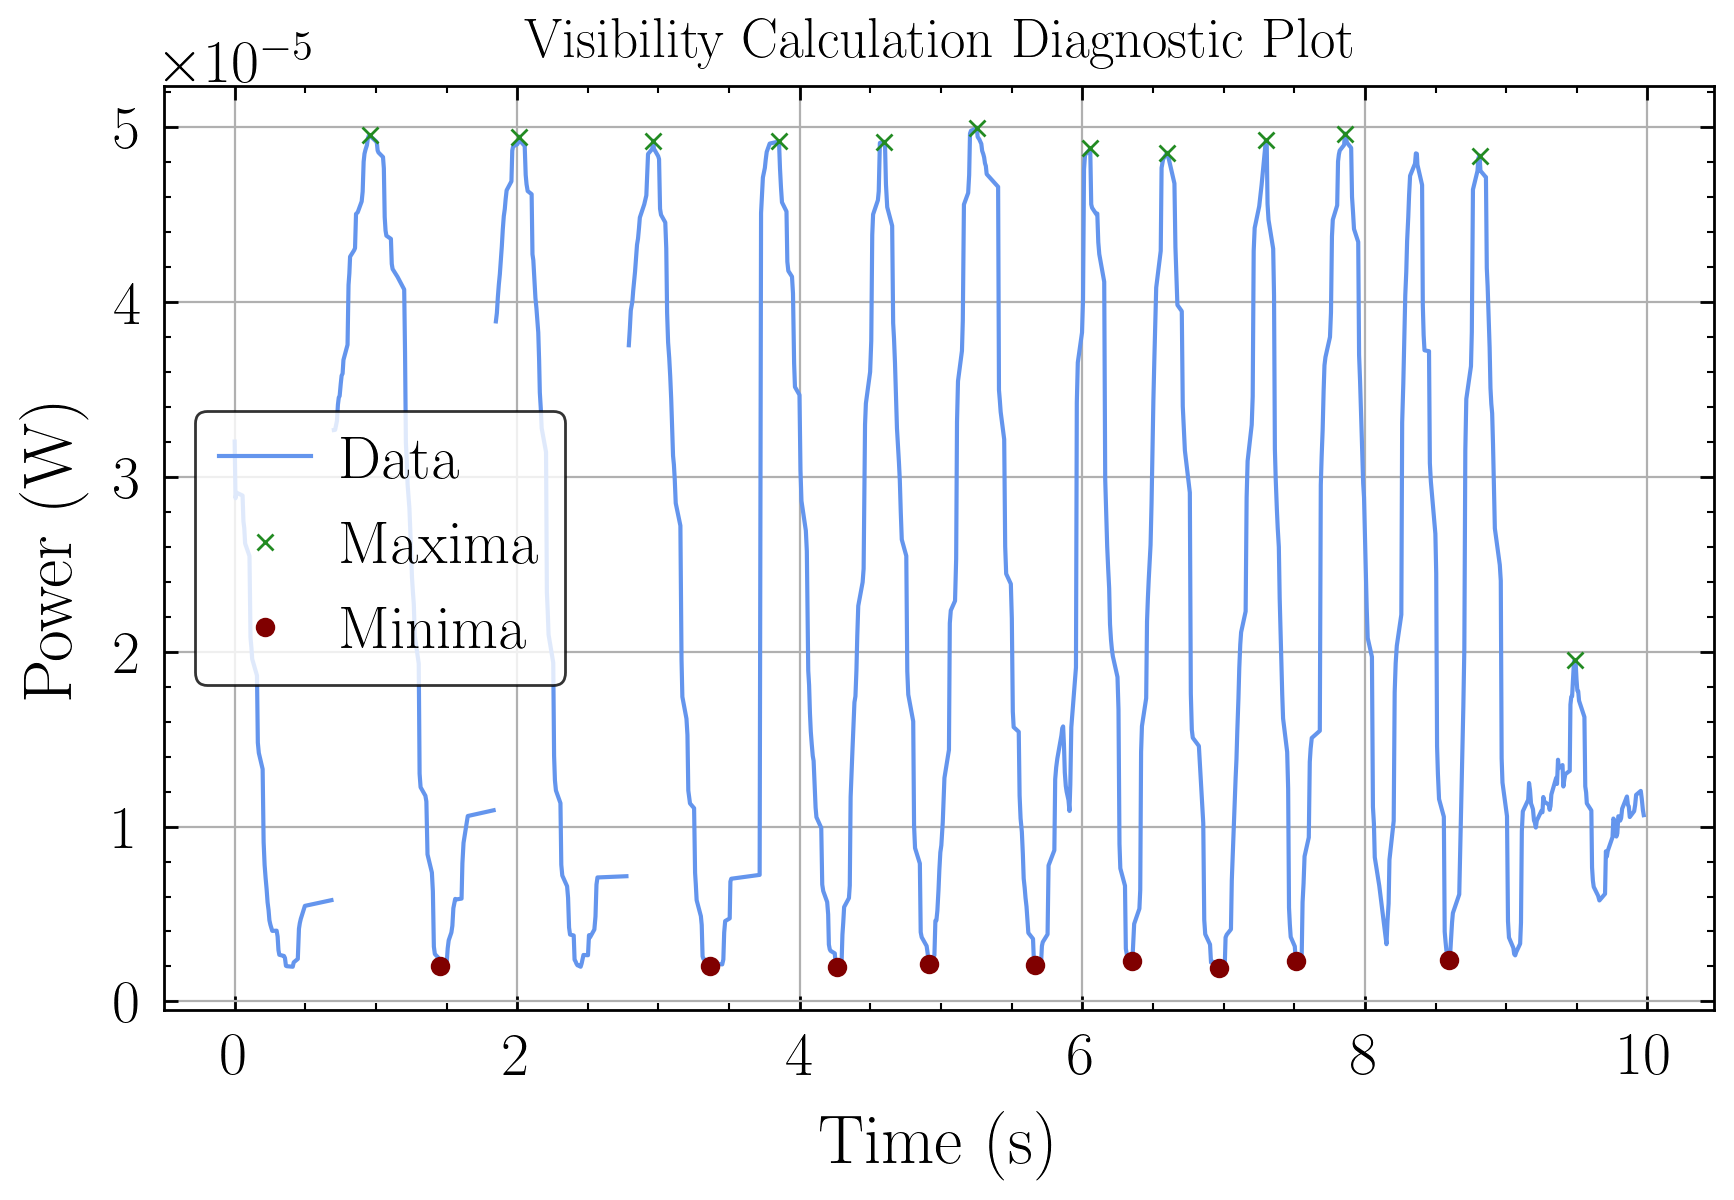

In [4]:
angles_reanalyzed = [0, 16, 72, 80]
for angle in angles_reanalyzed:
    vis = VisibilityCalculation(f'../data/classical no eraser/{angle}degrees.csv', distance = 44, prominence=0.75e-5)
    vis.run_diagnostic_plot()
    # replace the previous value
    visibilities[angles.index(angle)] = vis.get_visibility()[0]
    std_visibilities[angles.index(angle)] = vis.get_visibility()[1]

<h3> <b><u> Plotting the reanalyzed data with the required fit

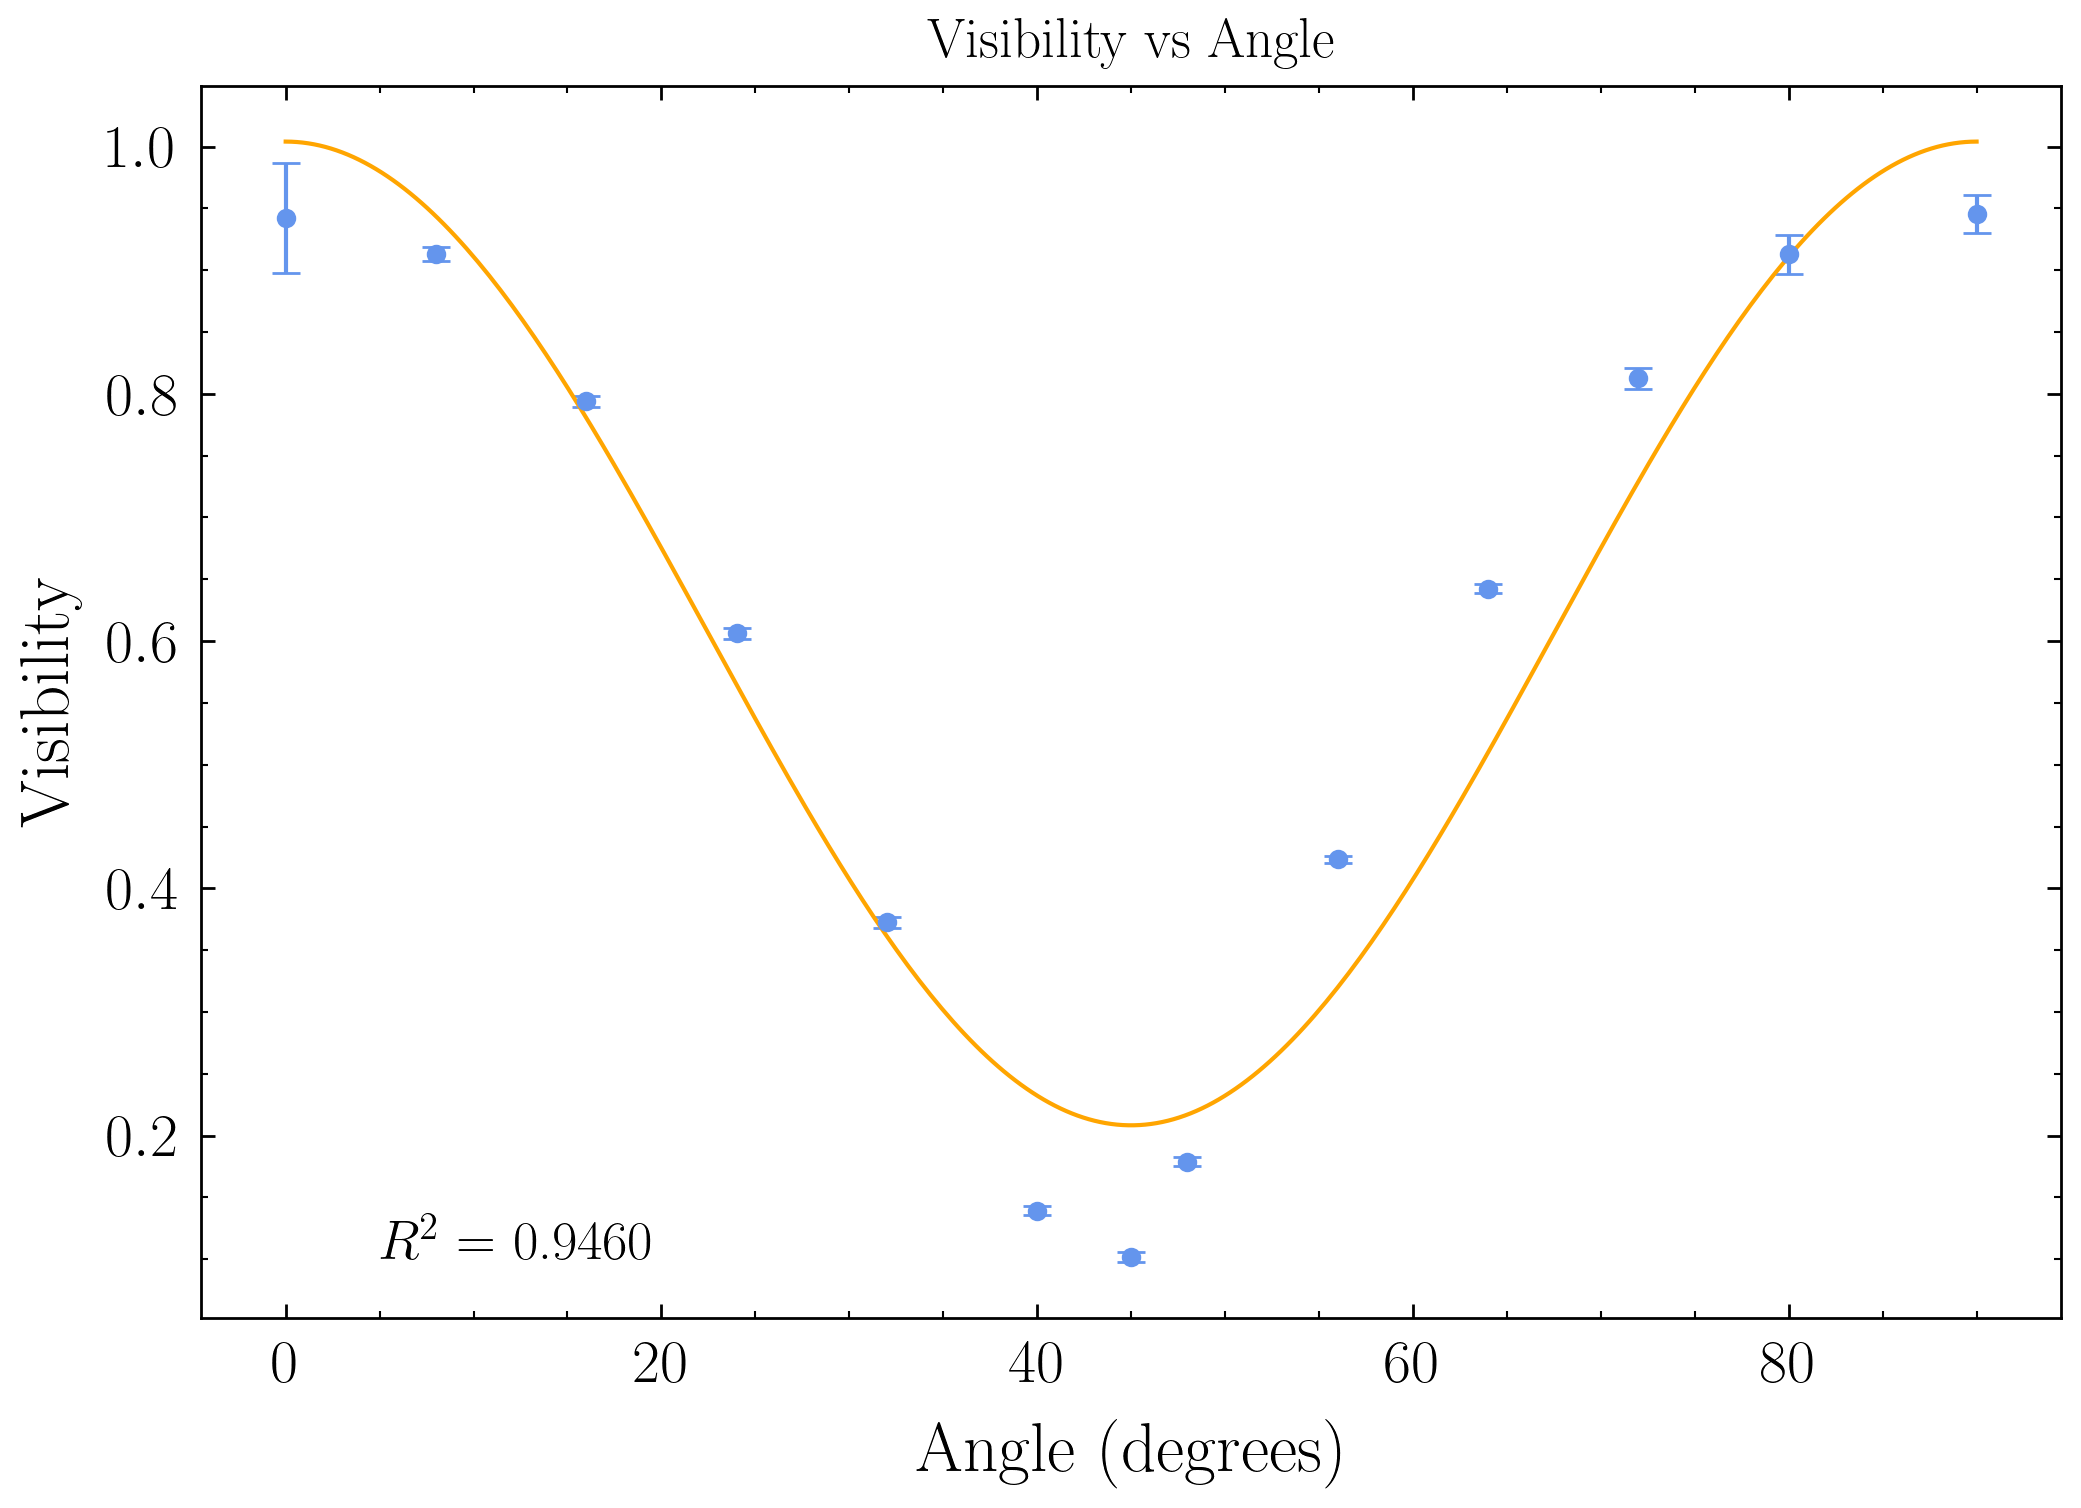

In [10]:


plt.errorbar(angles, visibilities, yerr=std_visibilities, fmt='o', capsize=5)

def curve_analyse(x, a, b):
    return a * np.cos(np.pi * x / 90)**2 + b

popt, pcov = curve_fit(curve_analyse, angles, visibilities, p0=[1, 0], maxfev=10000)
a_fit, b_fit = popt

x_fit = np.linspace(0, 90, 300)
y_fit = curve_analyse(x_fit, *popt)

plt.plot(x_fit, y_fit, 'orange')
plt.xlabel('Angle (degrees)')
plt.ylabel('Visibility')
plt.title('Visibility vs Angle', fontsize=20)

residuals = visibilities - curve_analyse(np.array(angles), *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((visibilities - np.mean(visibilities))**2)
r_squared = 1 - (ss_res / ss_tot)
plt.text(5, 0.1, f'$R^2$ = {r_squared:.4f}', fontsize=20)

plt.show()


<h2><b><u> Data with a quarter wave plate and polarizer (eraser)

Analyzing angle 0 degrees (1/13)


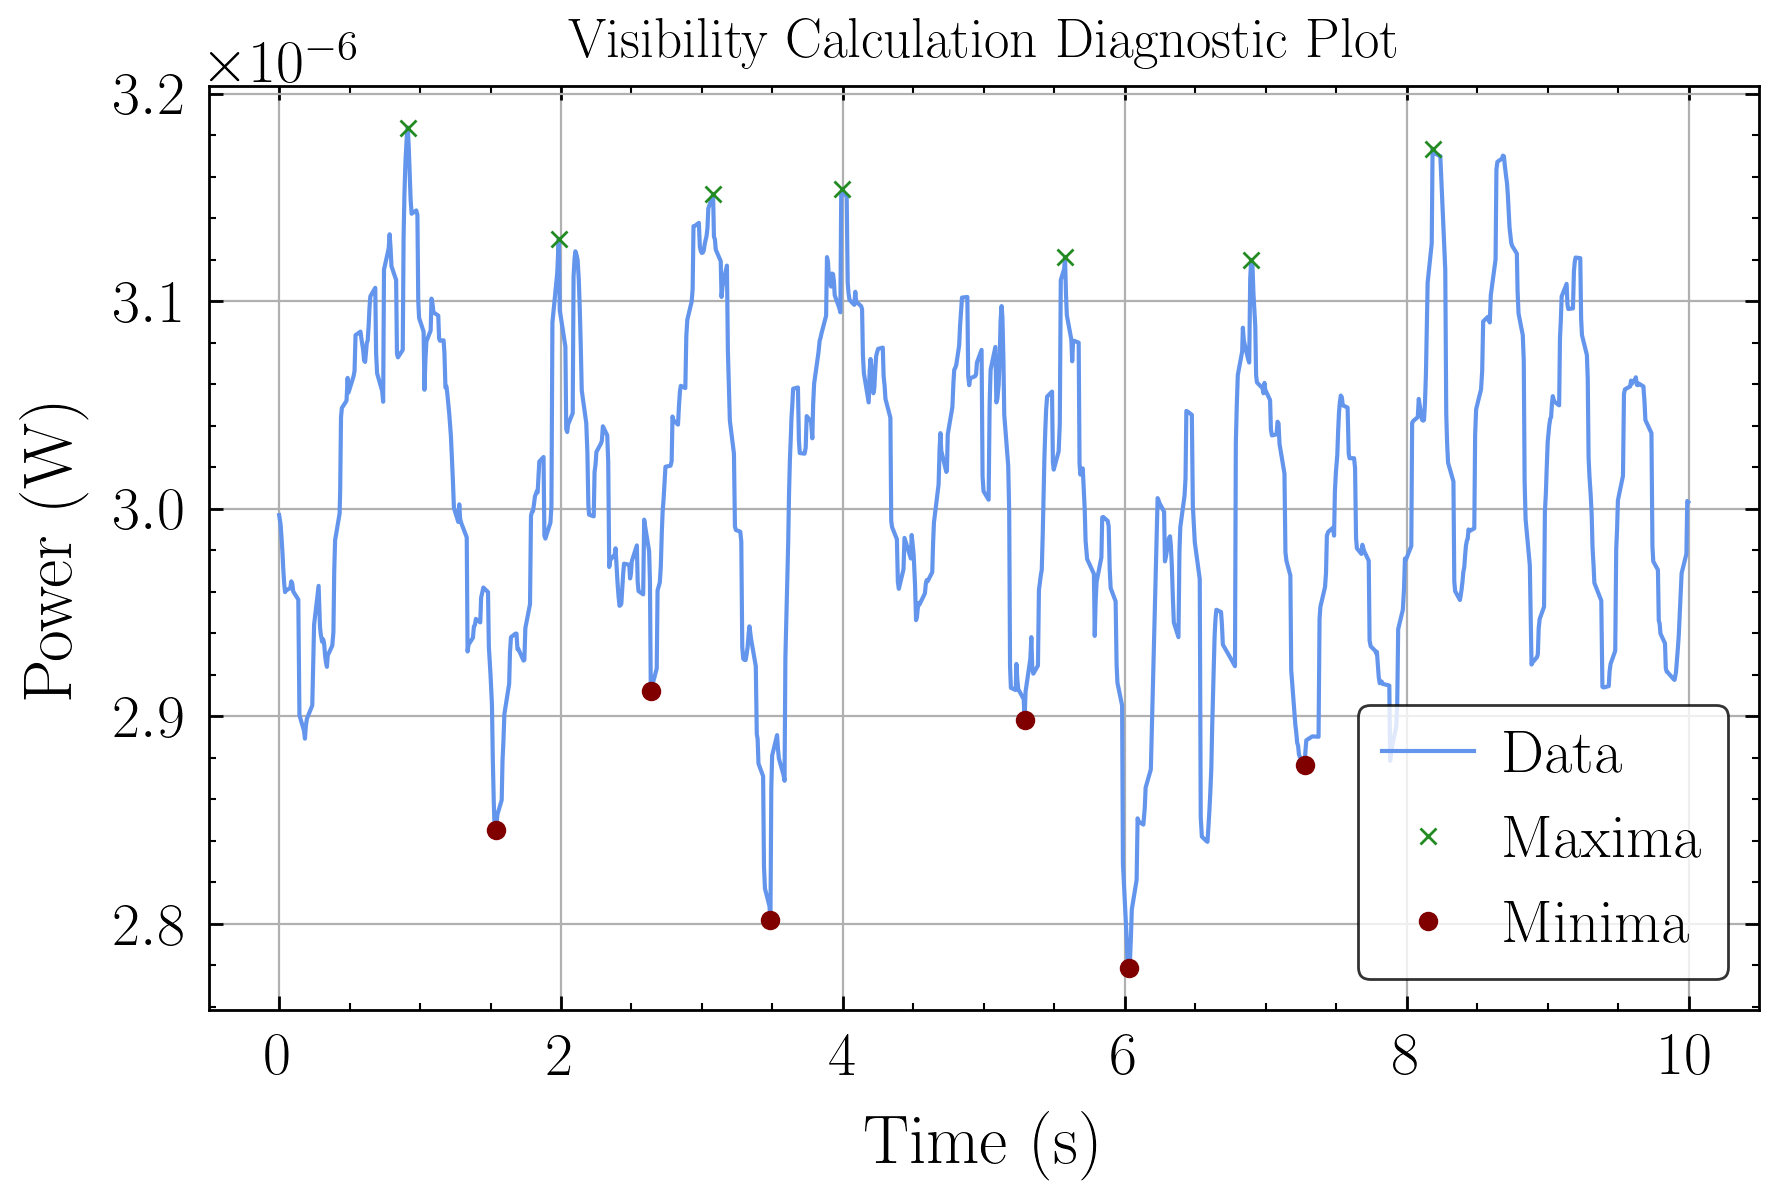

Analyzing angle 8 degrees (2/13)


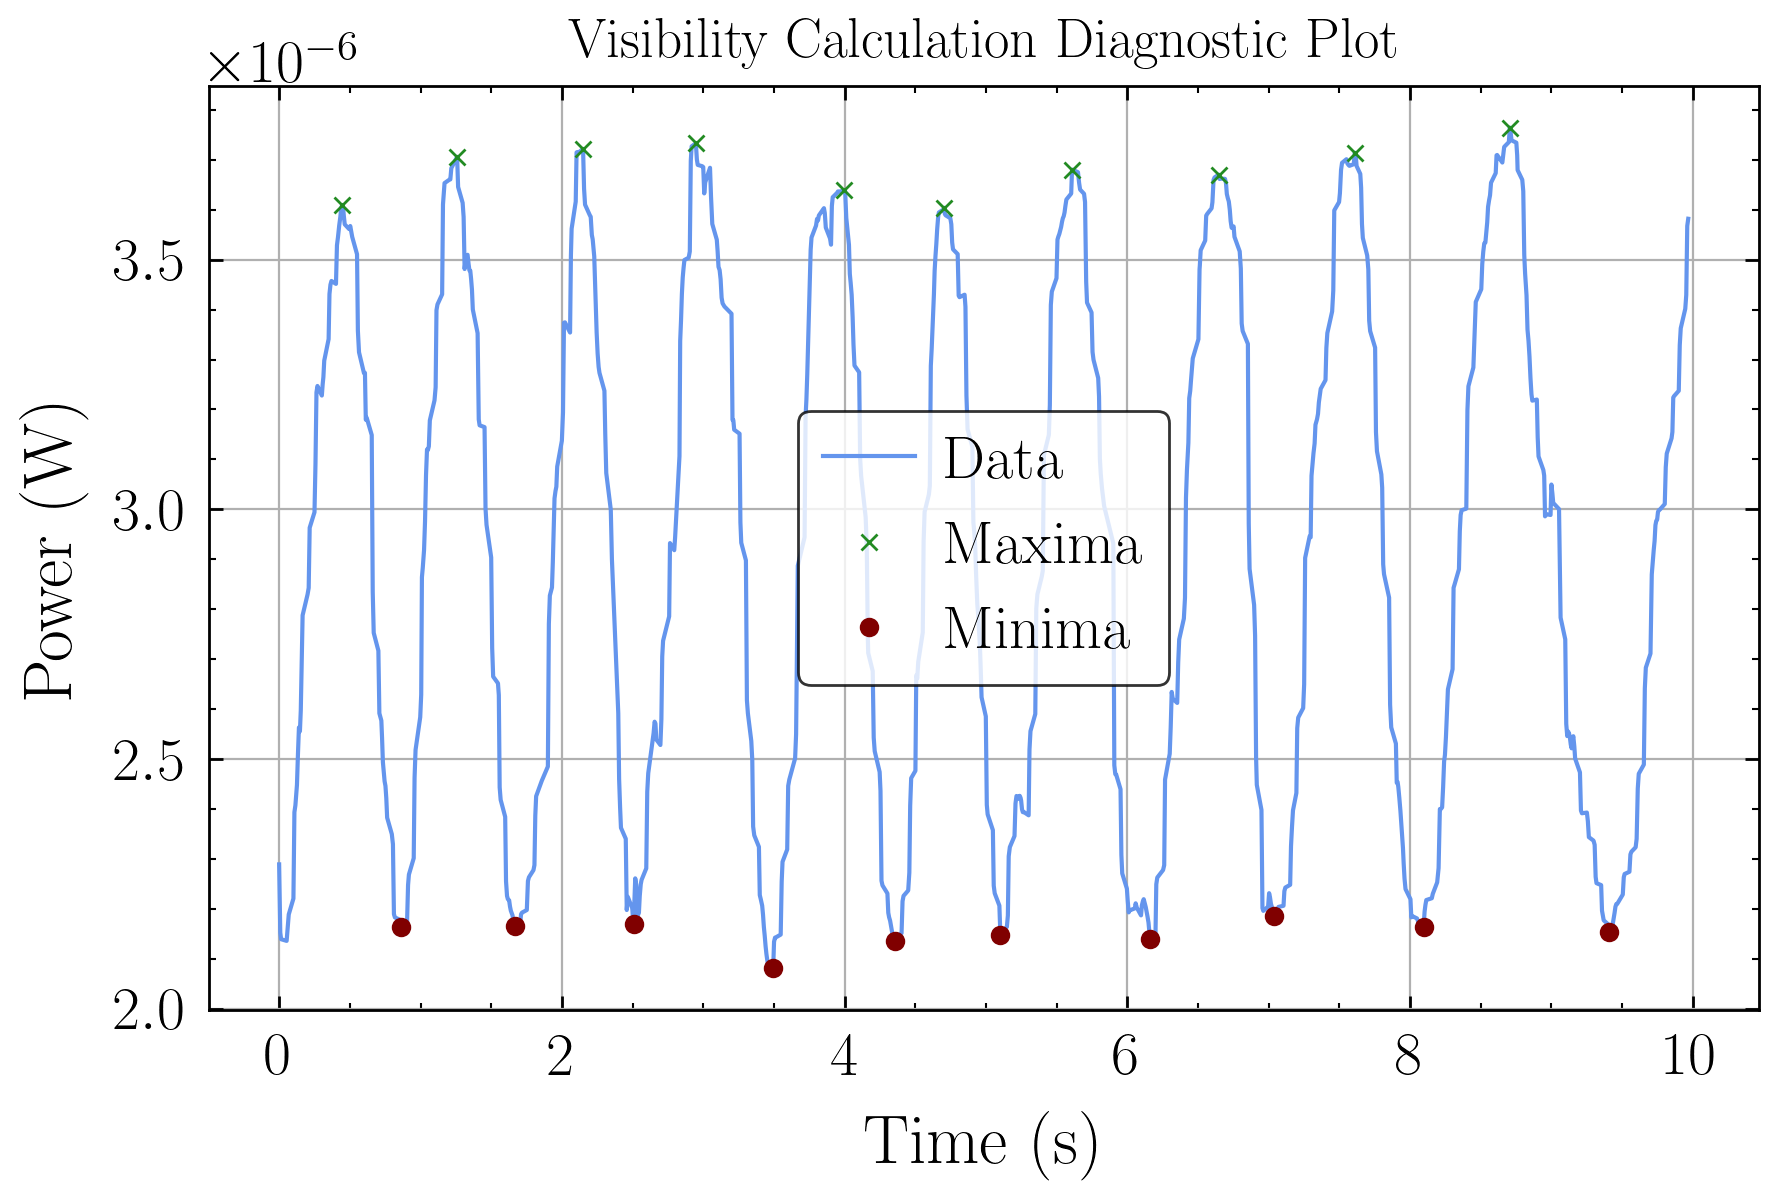

Analyzing angle 16 degrees (3/13)


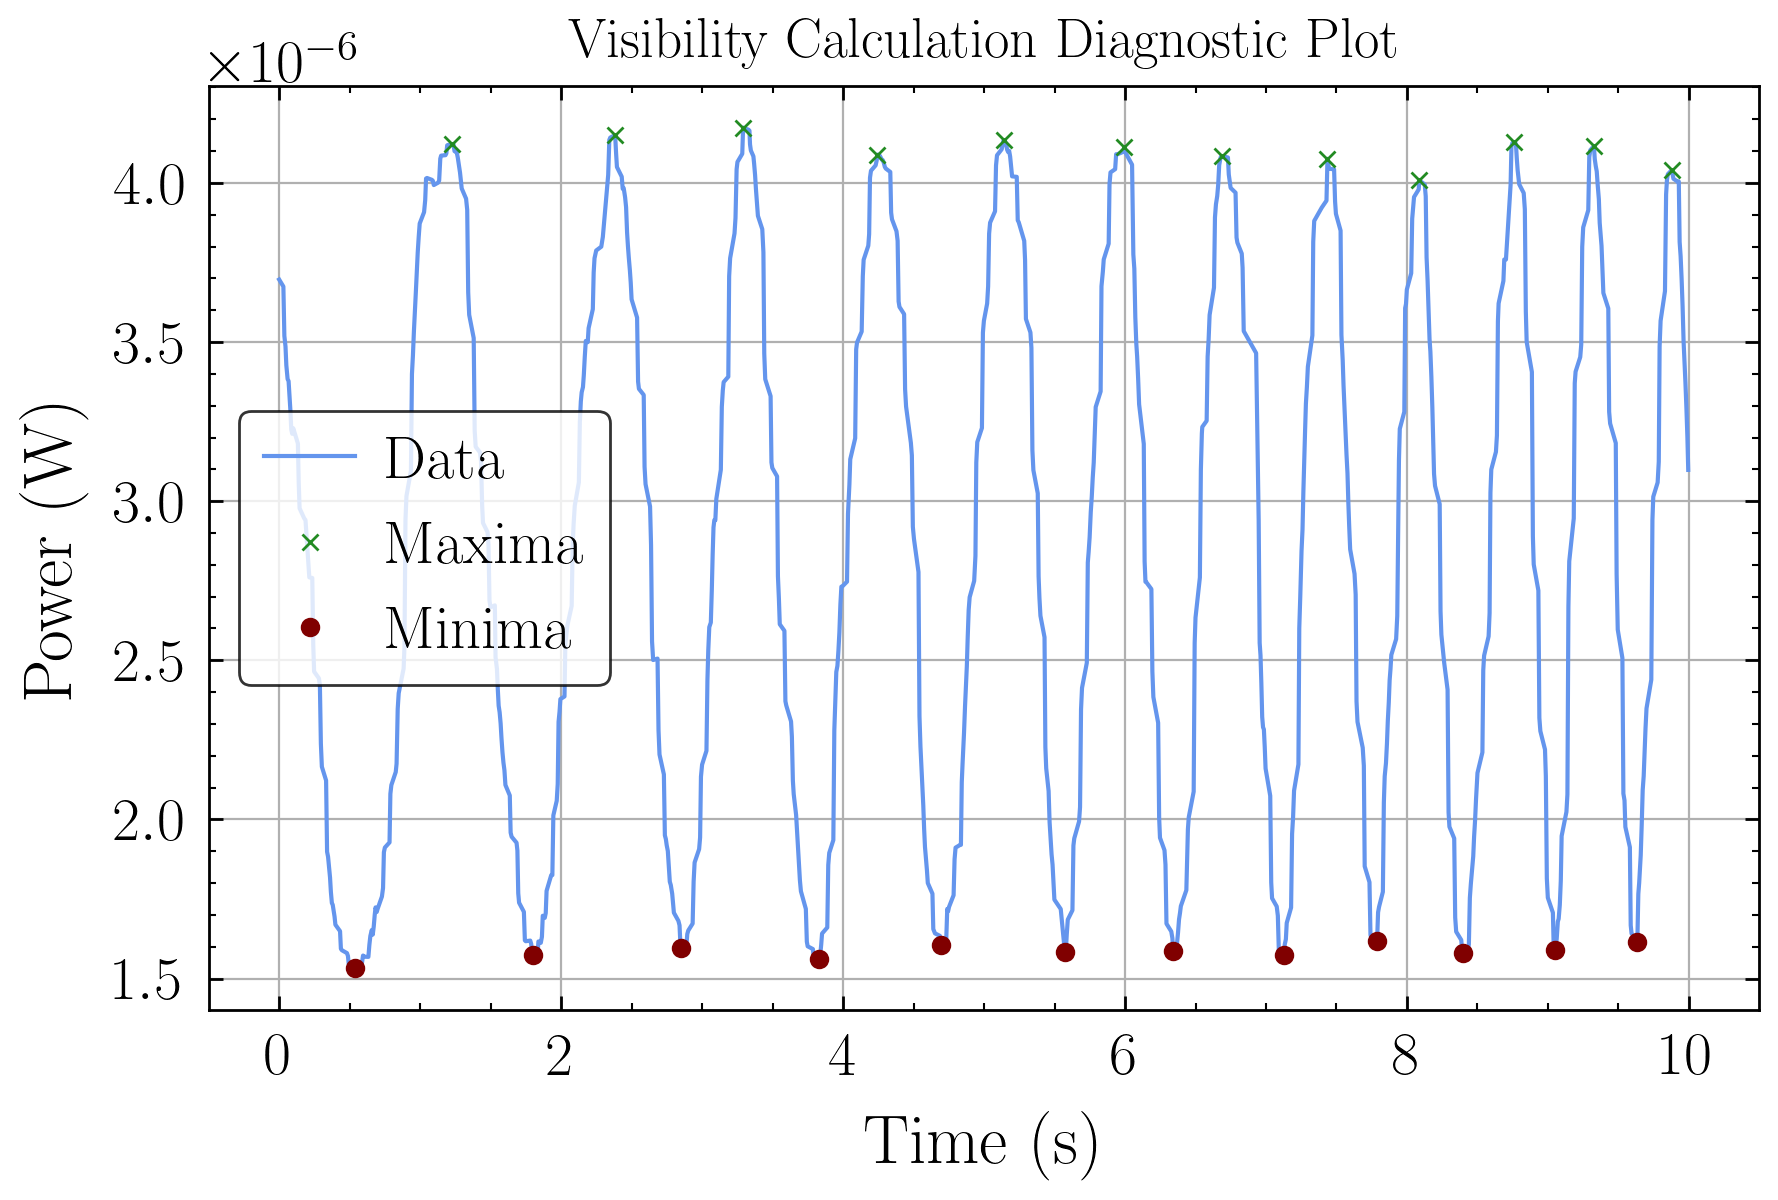

Analyzing angle 24 degrees (4/13)


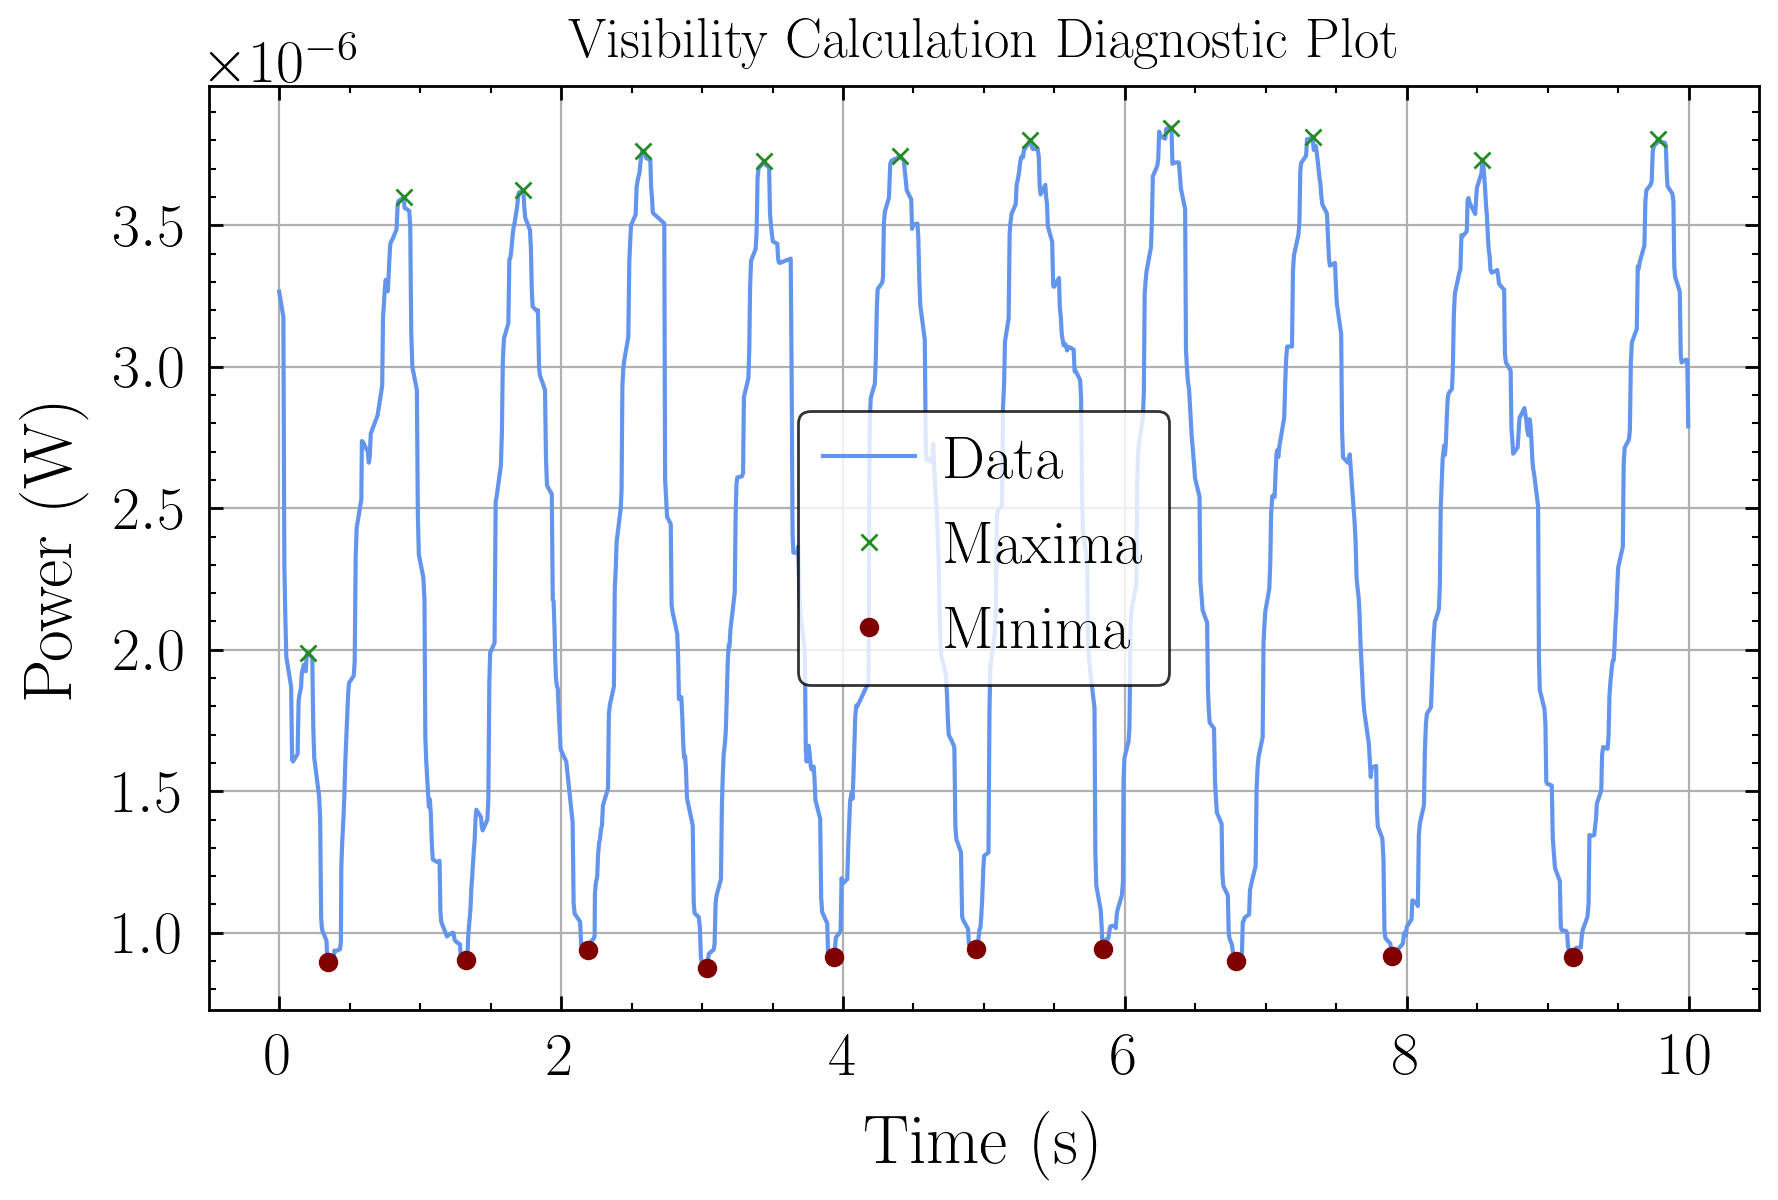

Analyzing angle 32 degrees (5/13)


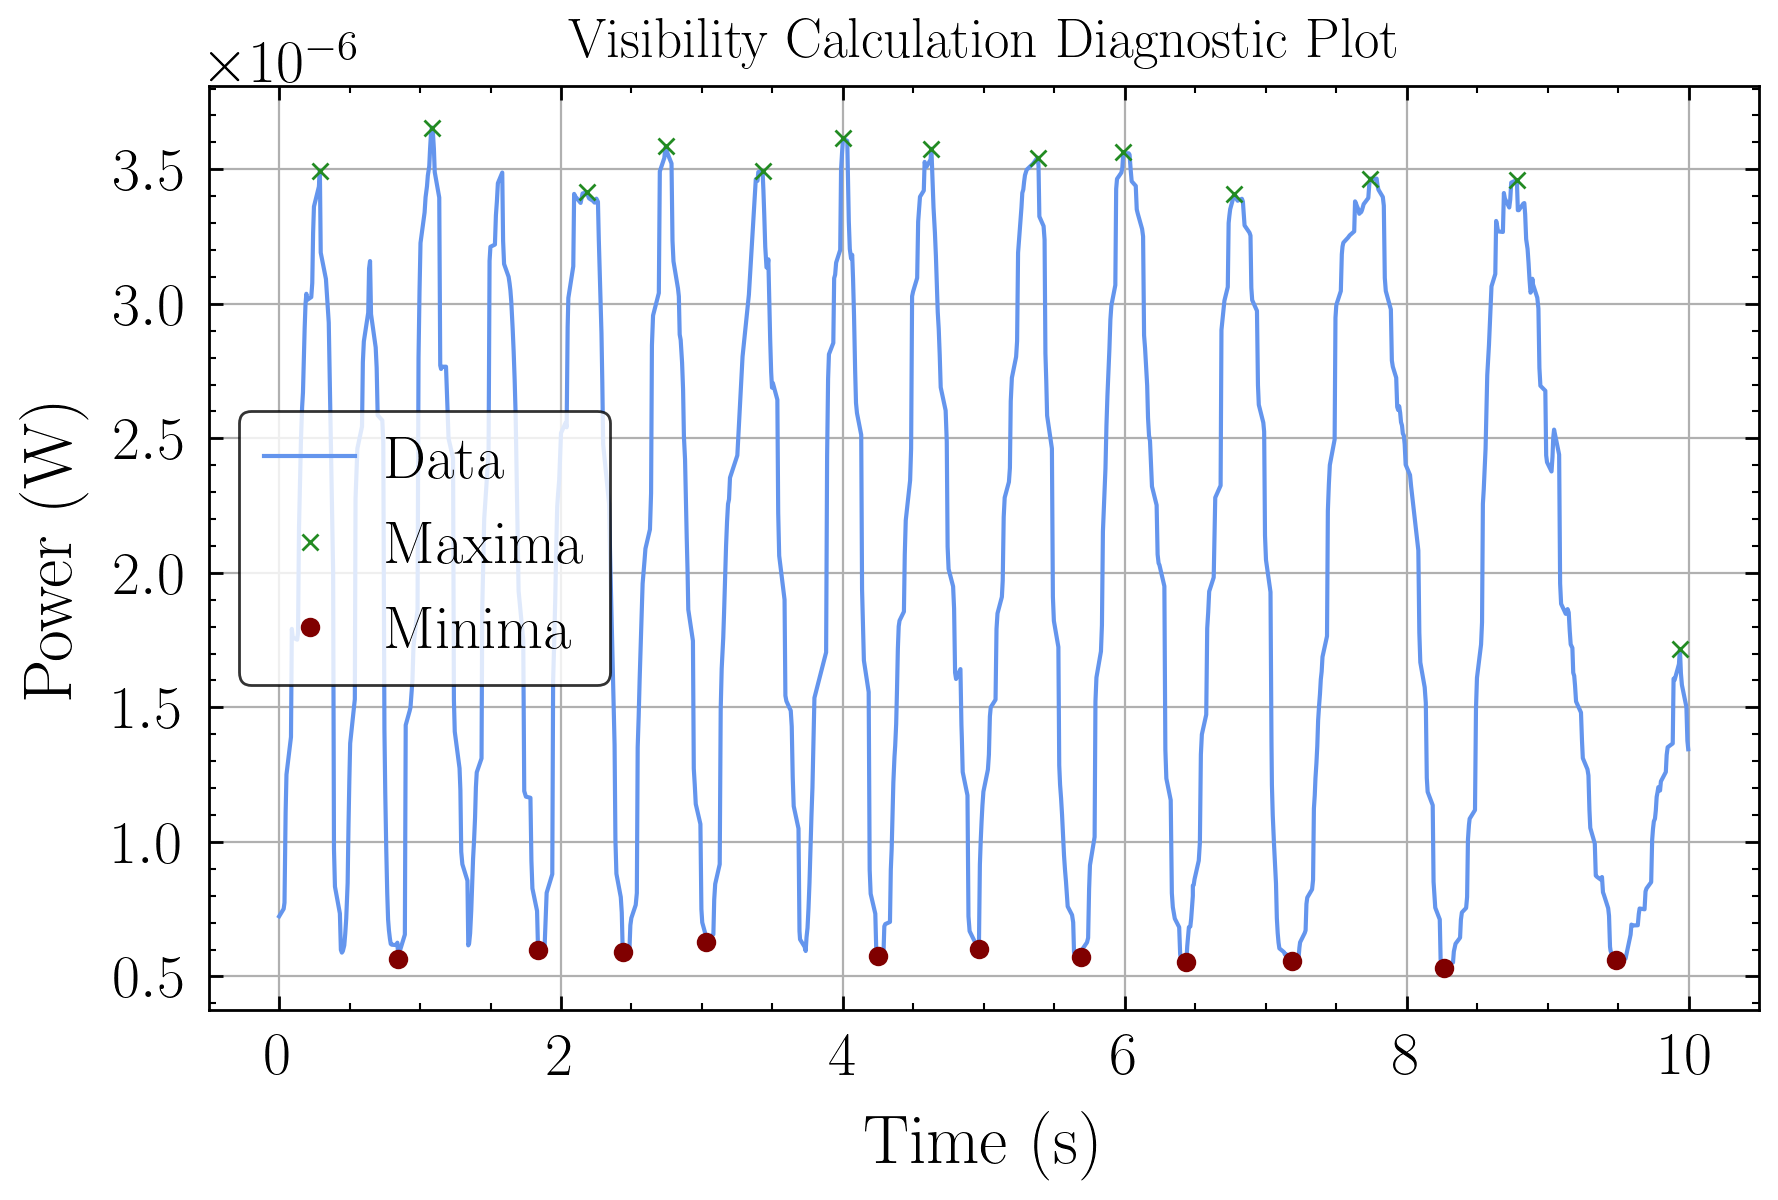

Analyzing angle 40 degrees (6/13)


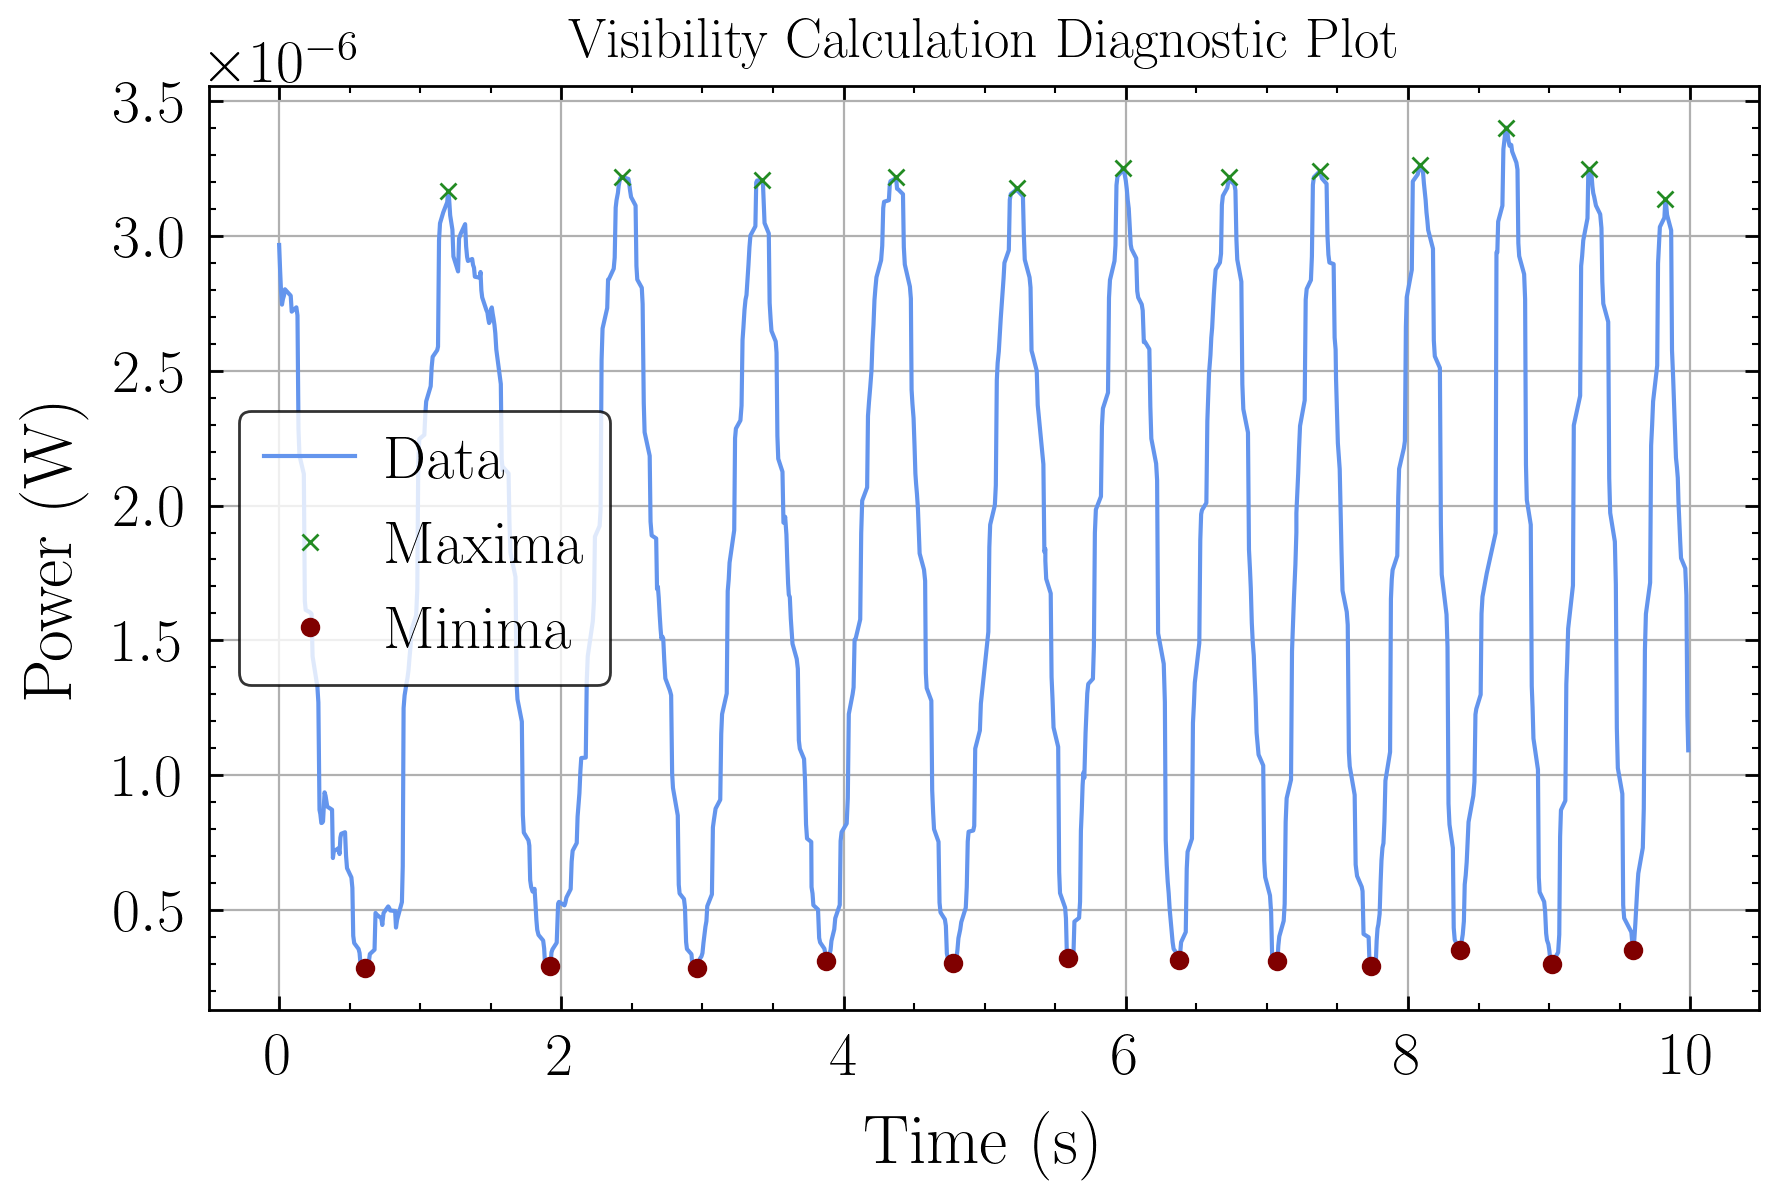

Analyzing angle 45 degrees (7/13)


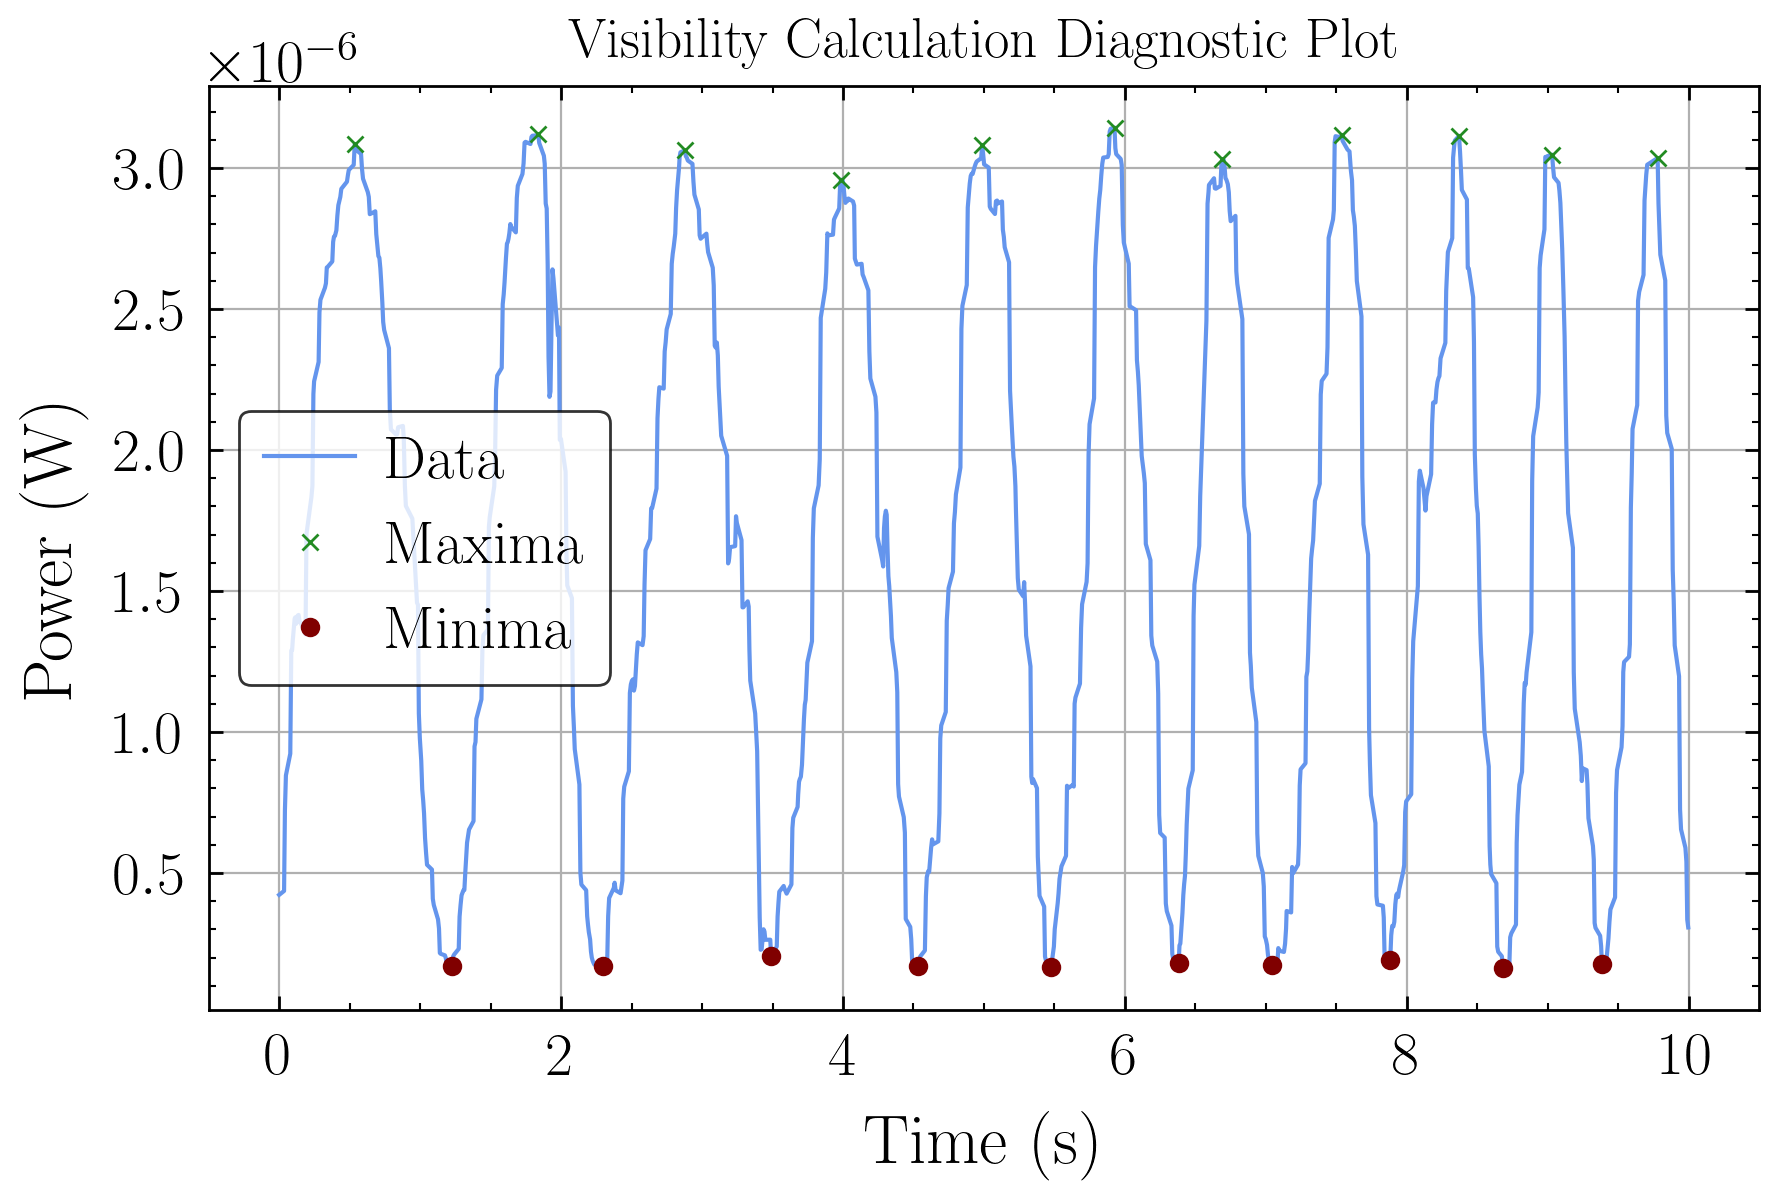

Analyzing angle 48 degrees (8/13)


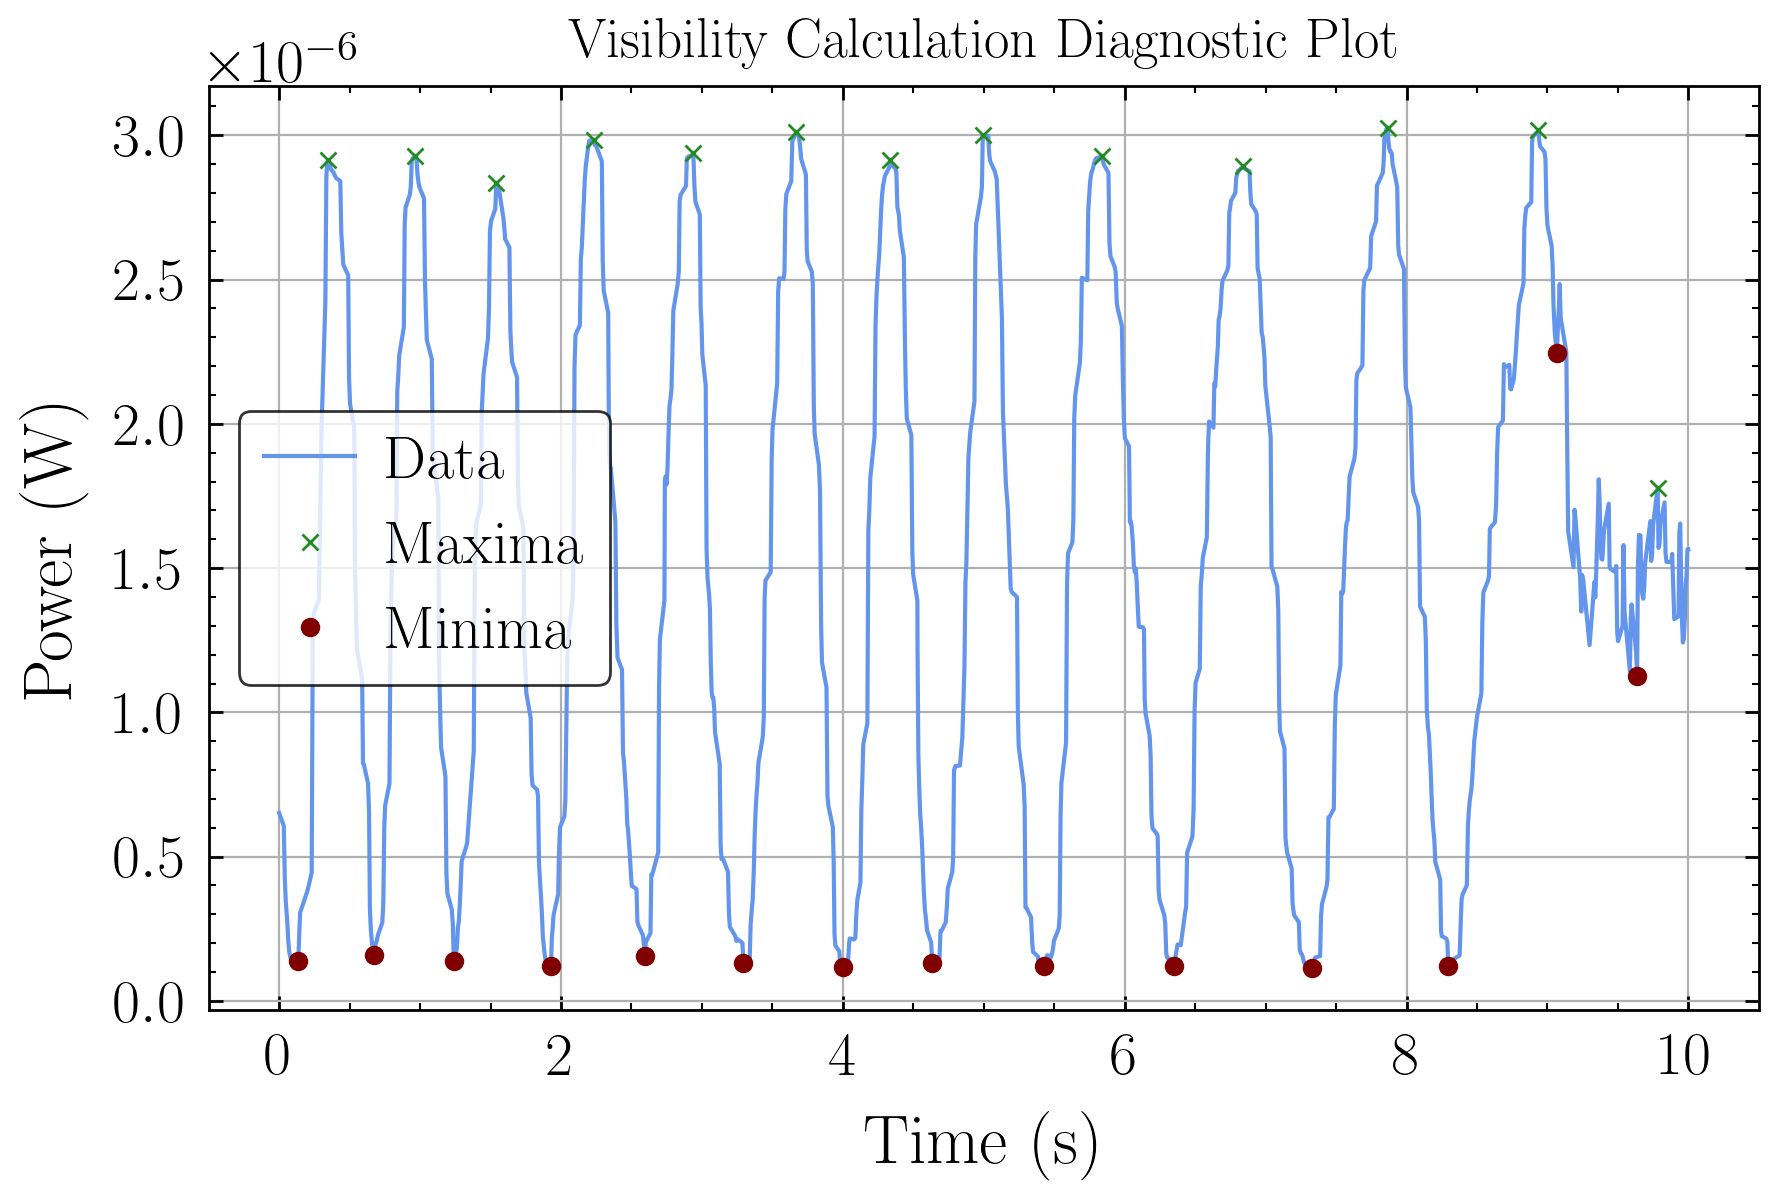

Analyzing angle 56 degrees (9/13)


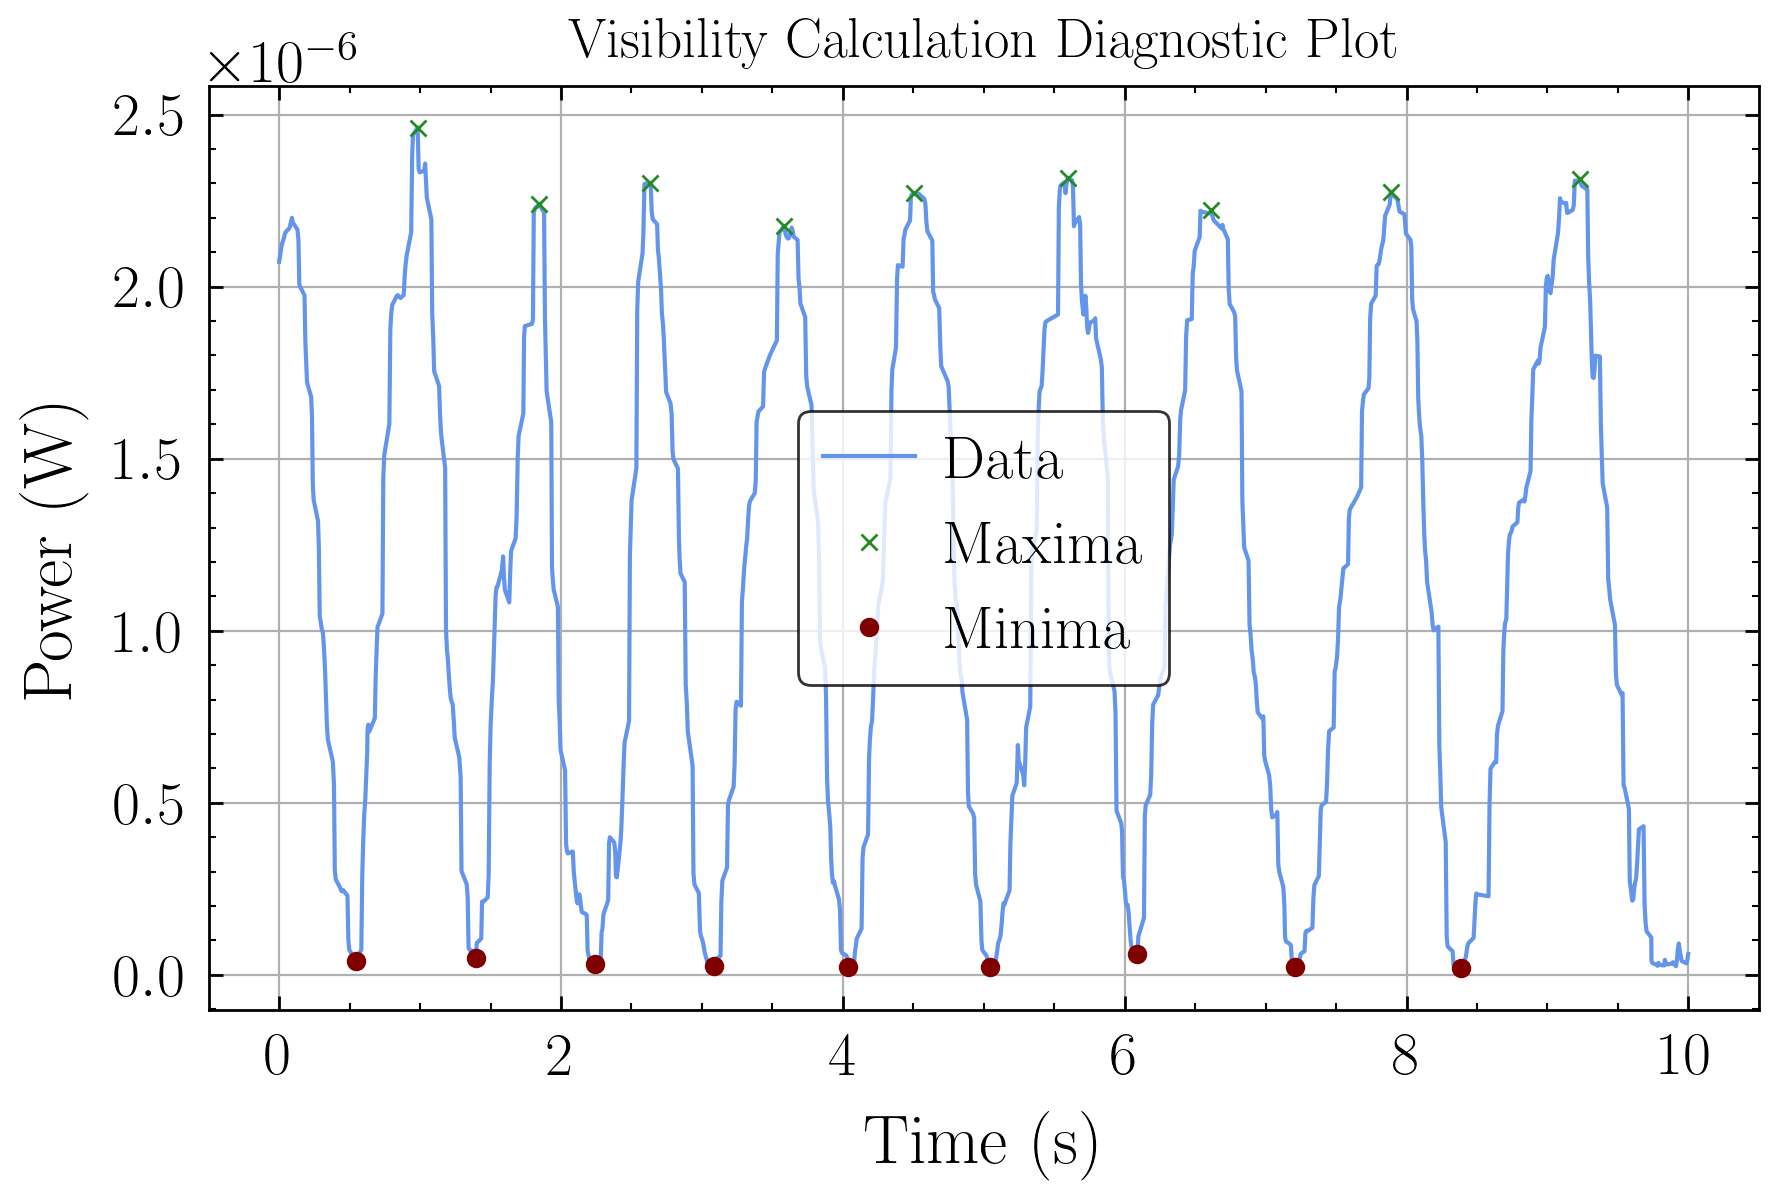

Analyzing angle 64 degrees (10/13)


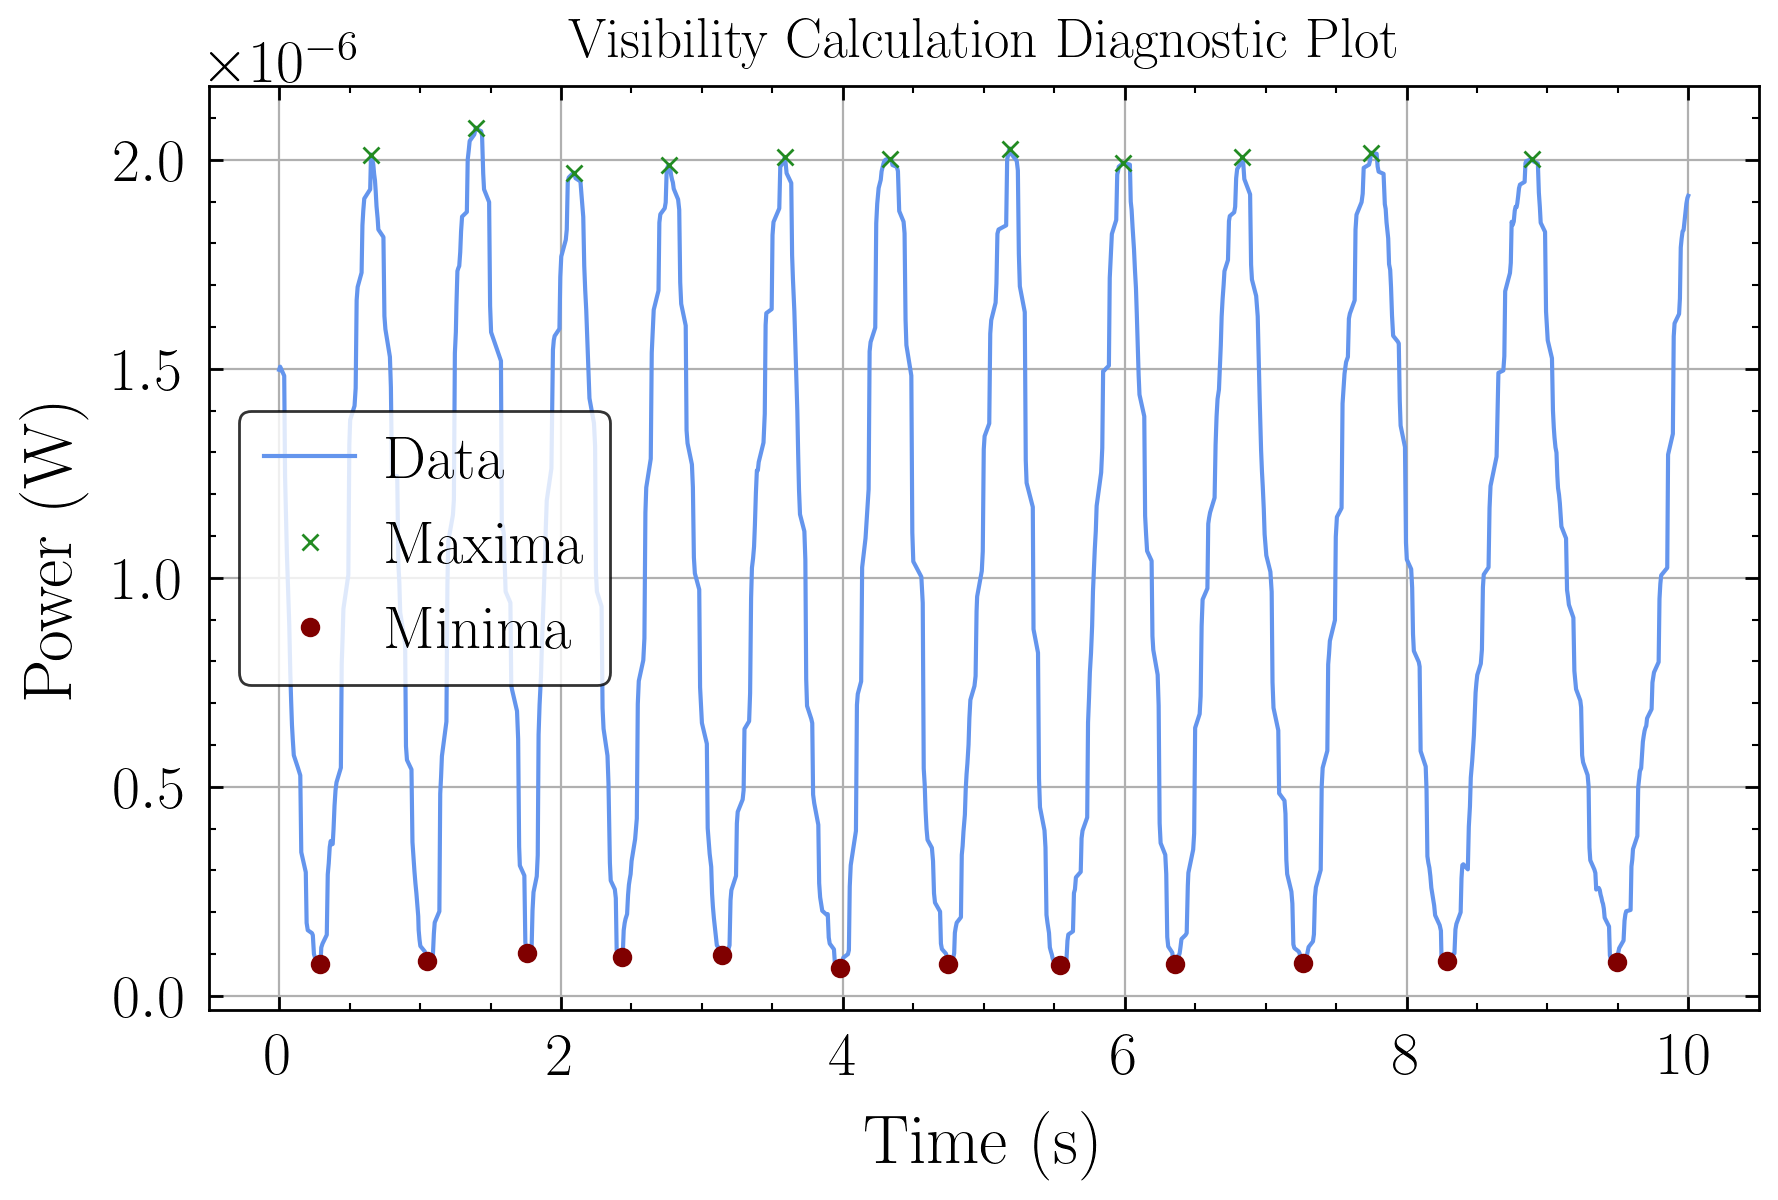

Analyzing angle 72 degrees (11/13)


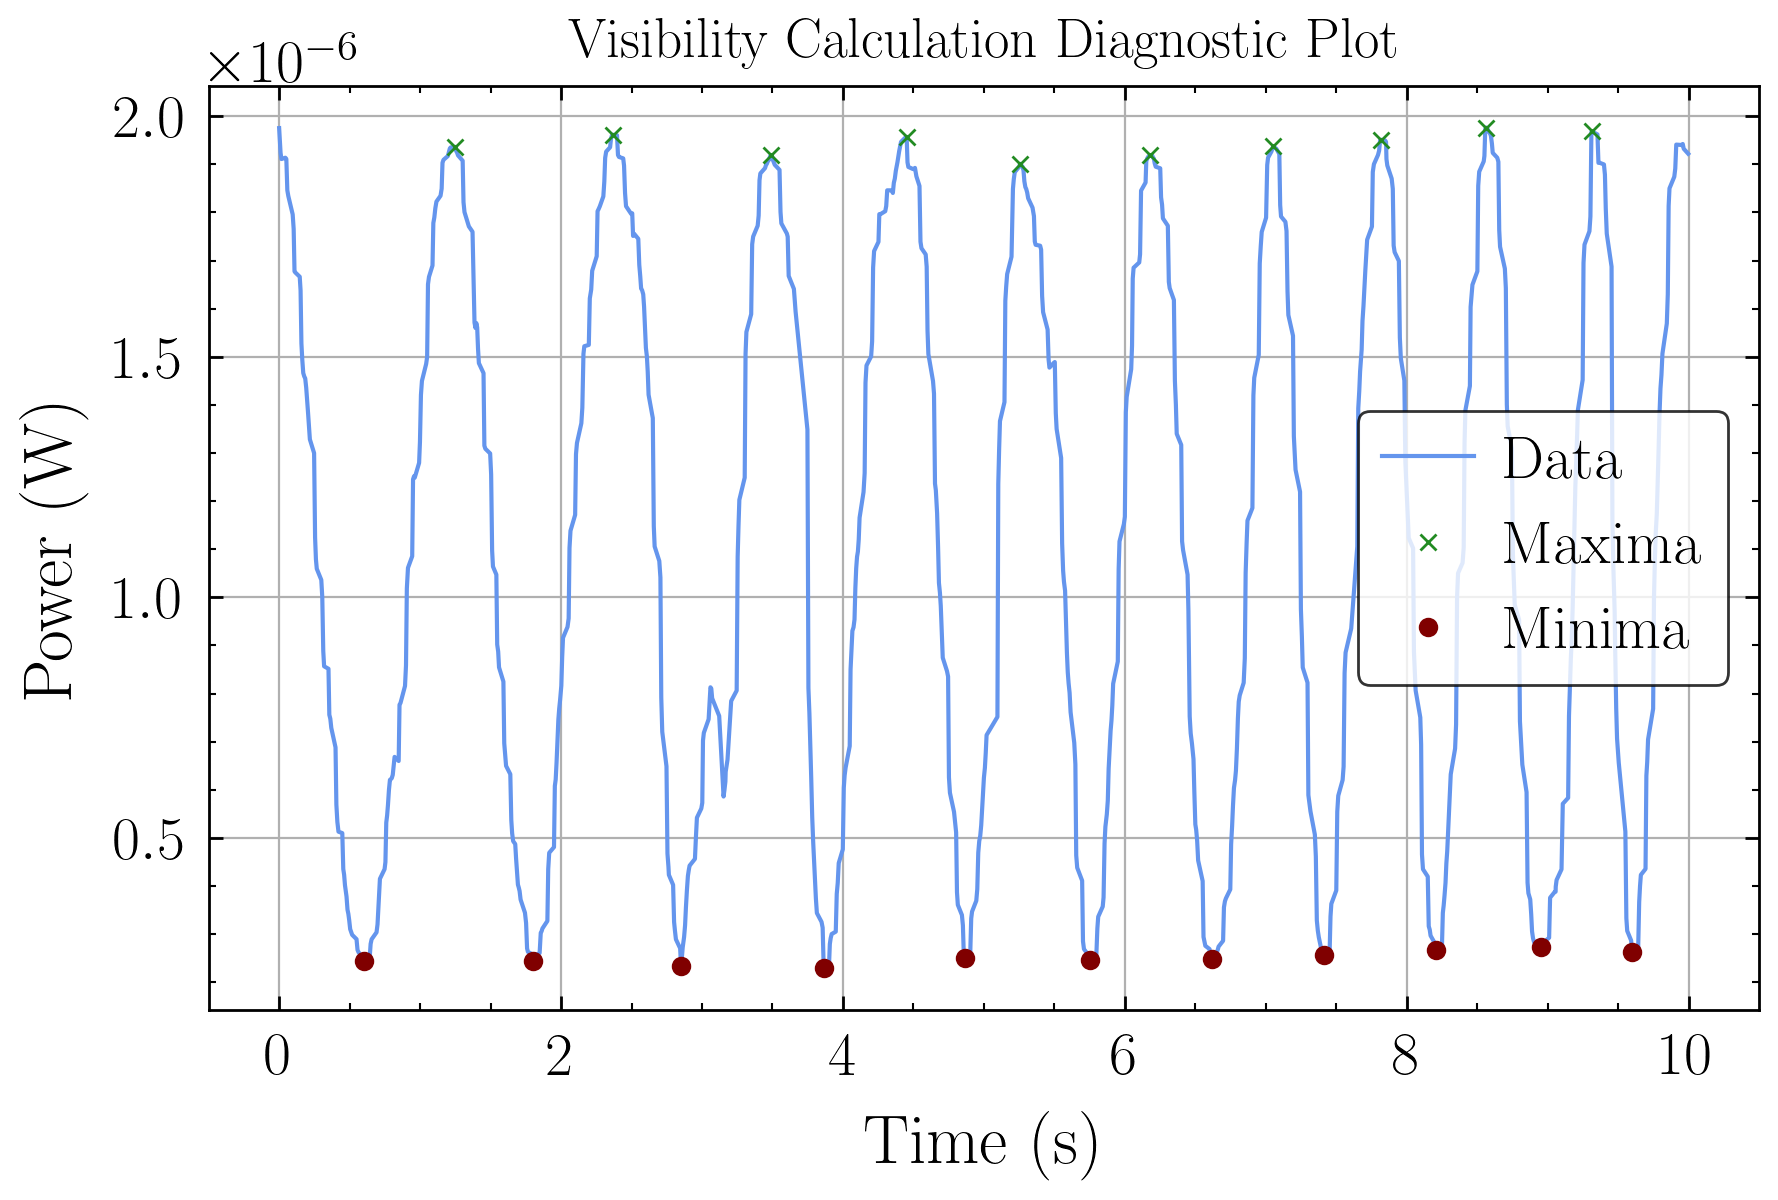

Analyzing angle 80 degrees (12/13)


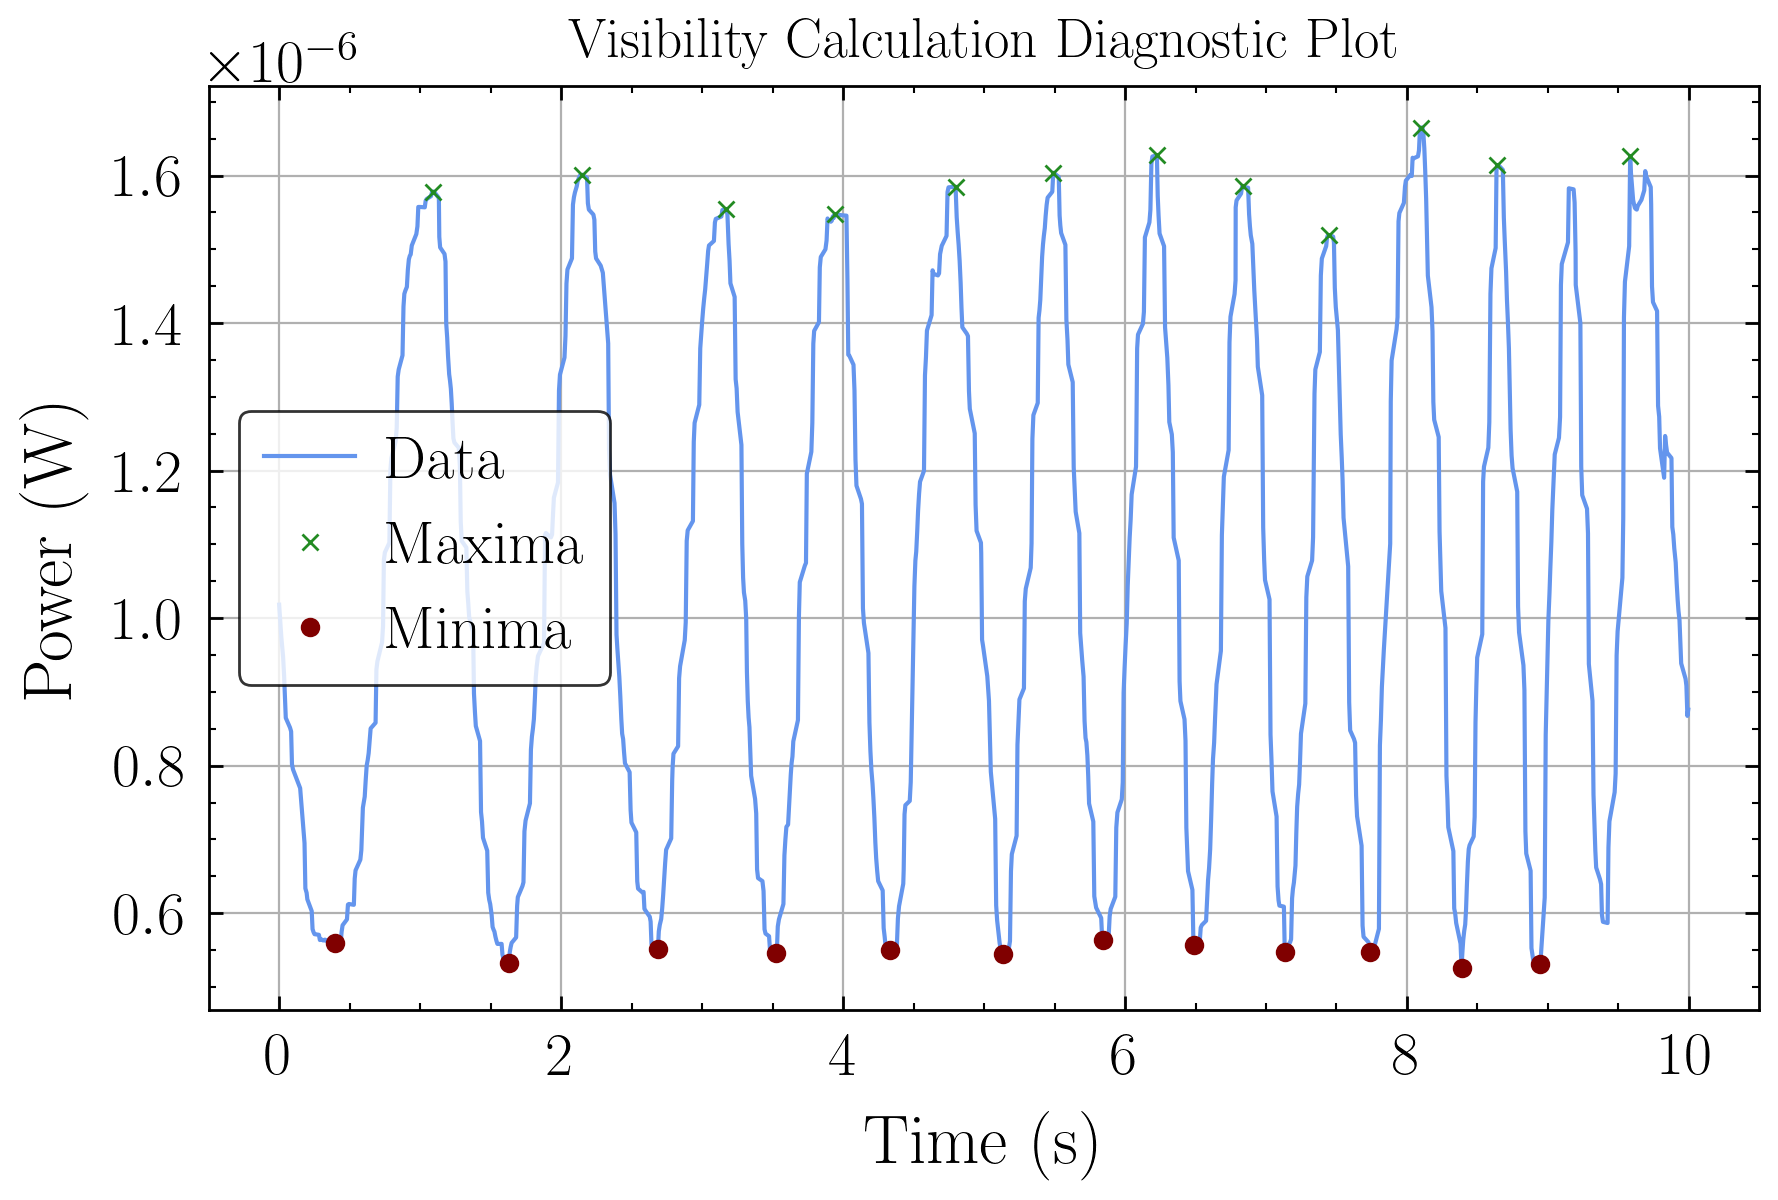

Analyzing angle 90 degrees (13/13)


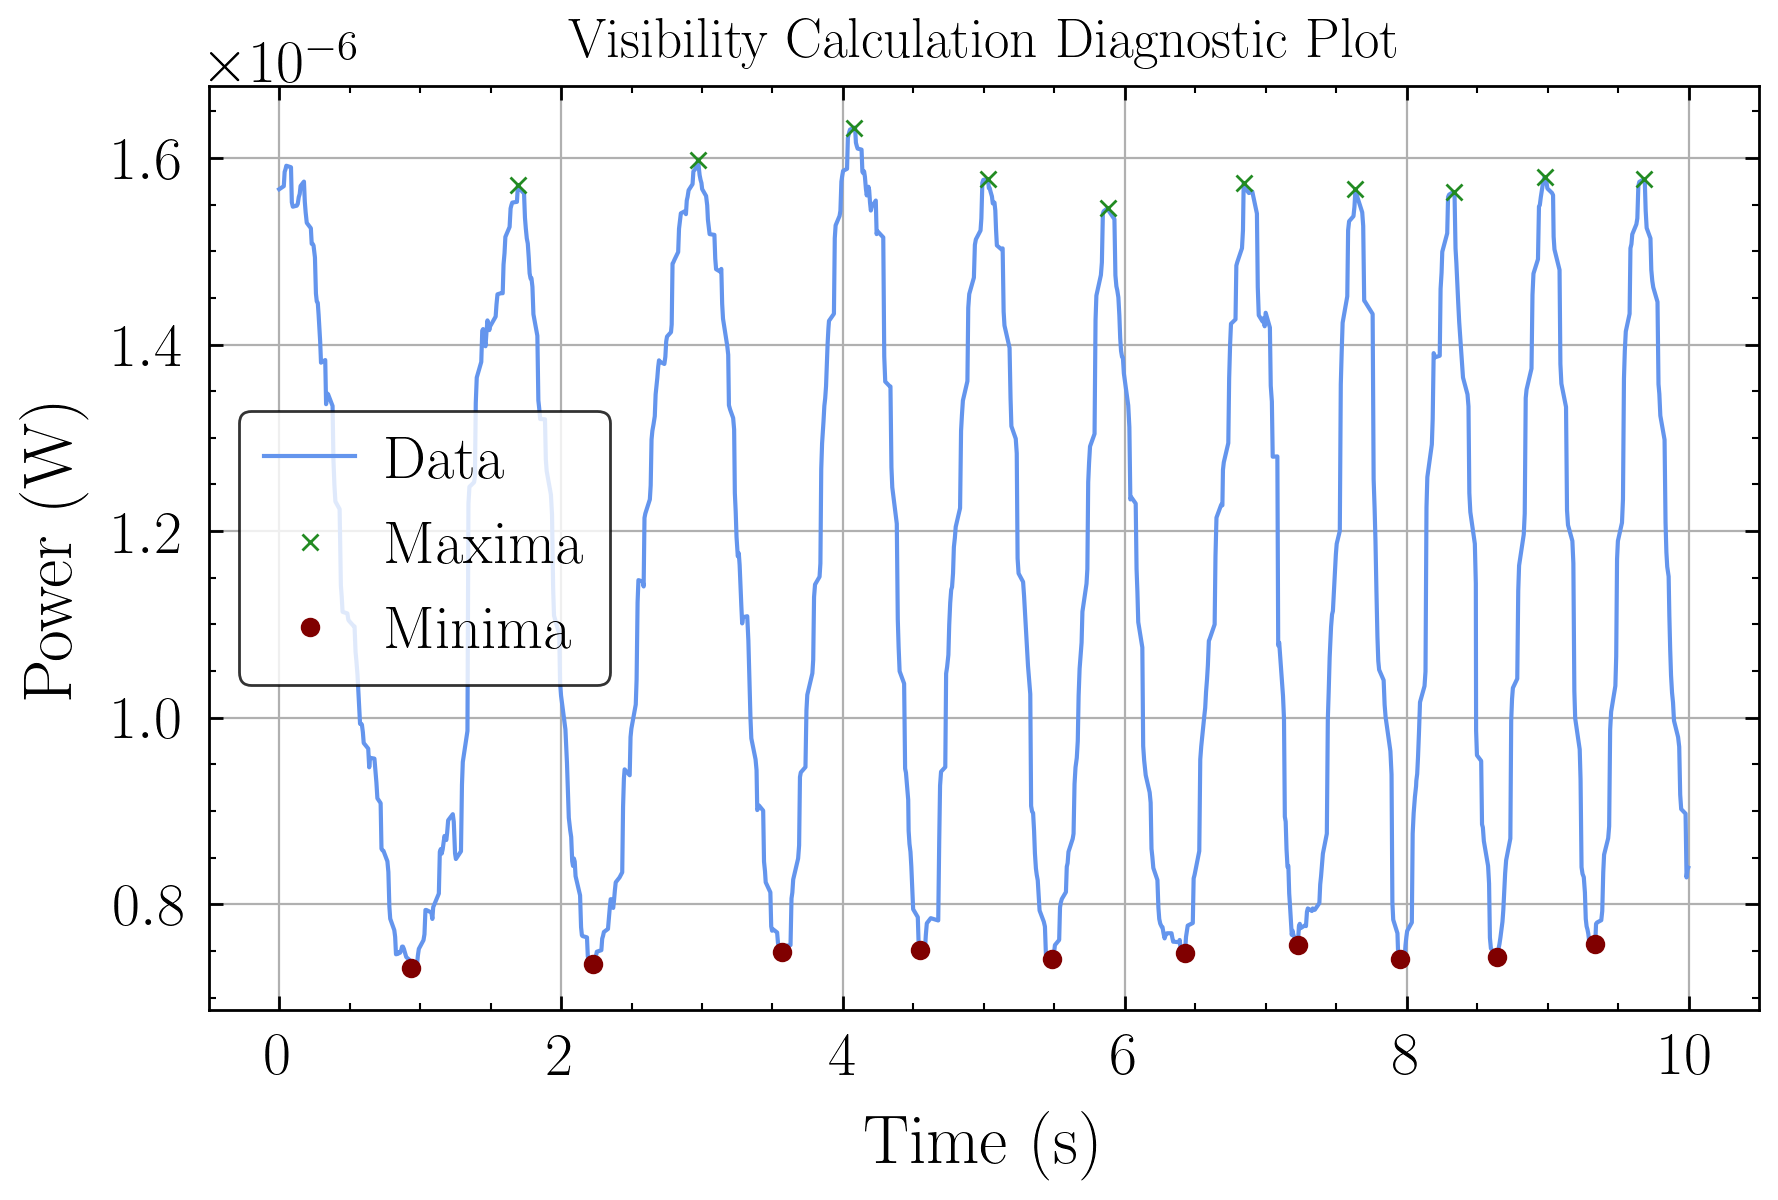

In [21]:
visibilities_eraser = []
std_visibilities_eraser = []
for i, angle in enumerate(angles):
    print(f'Analyzing angle {angle} degrees ({i+1}/{len(angles)})')
    vis = VisibilityCalculation(f'../data/classical eraser/{angle}degrees.csv', distance = 43, prominence=0.2e-6)
    vis.run_diagnostic_plot()   # Uncomment to see the diagnostic plots
    visibilities_eraser.append(vis.get_visibility()[0])
    std_visibilities_eraser.append(vis.get_visibility()[1])
    

Text(0.5, 1.0, 'Visibility vs Angle with Quantum Eraser')

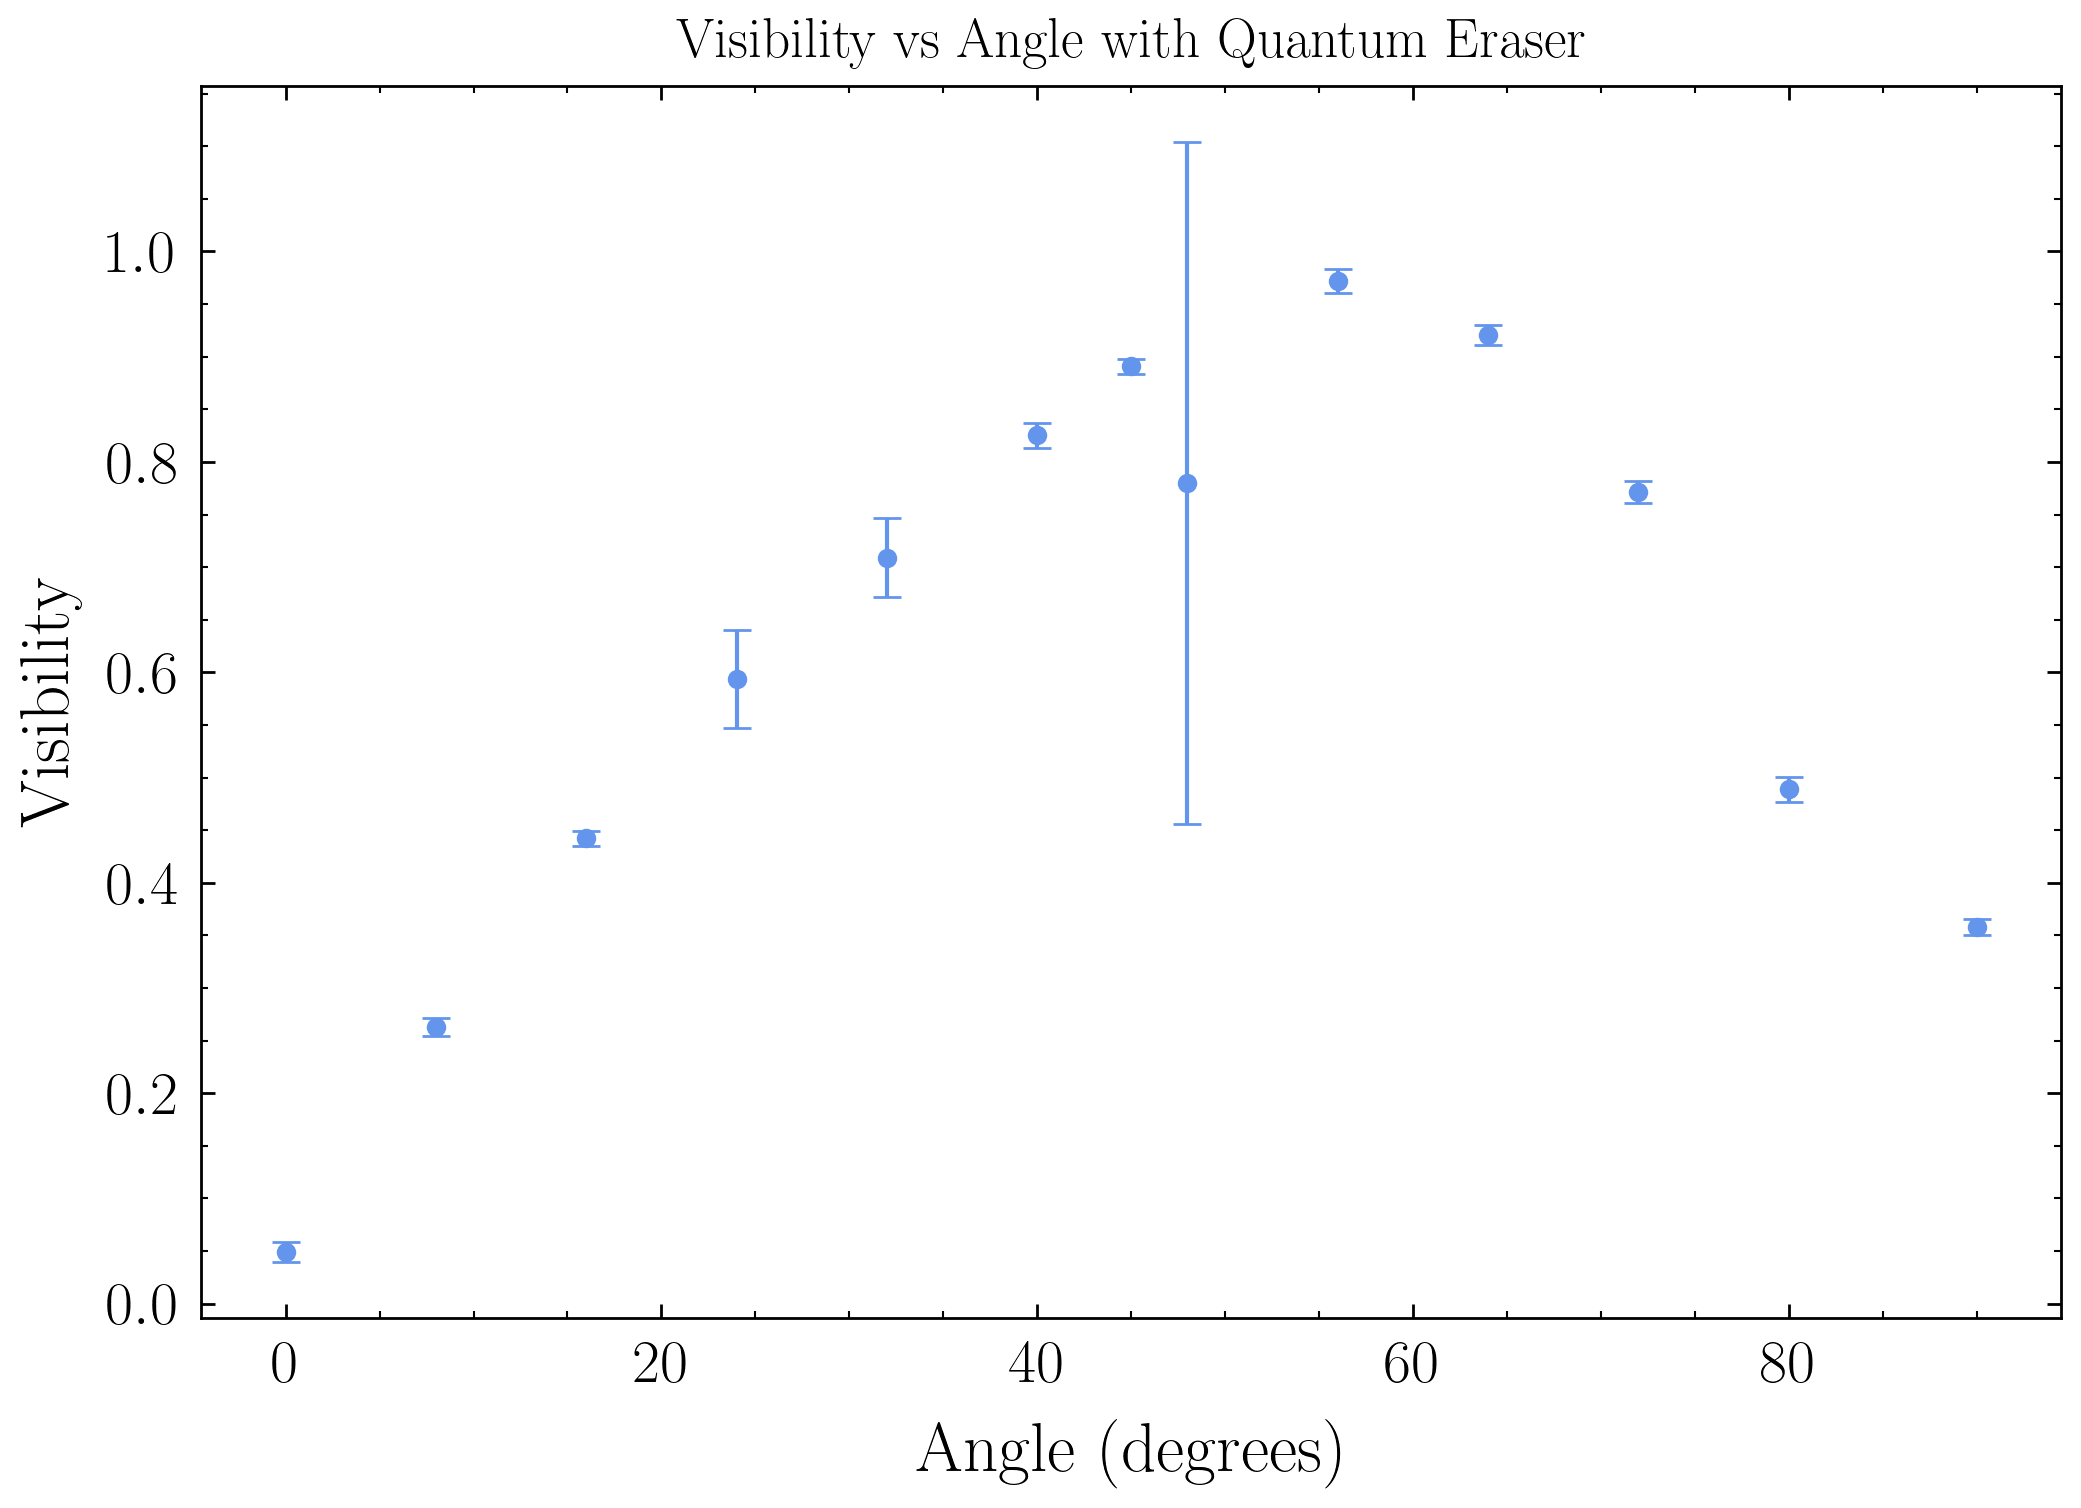

In [14]:
plt.errorbar(angles, visibilities_eraser, yerr=std_visibilities_eraser, fmt='o', capsize=5)
plt.ylabel('Visibility')
plt.xlabel('Angle (degrees)')
plt.title('Visibility vs Angle with Quantum Eraser', fontsize=20)


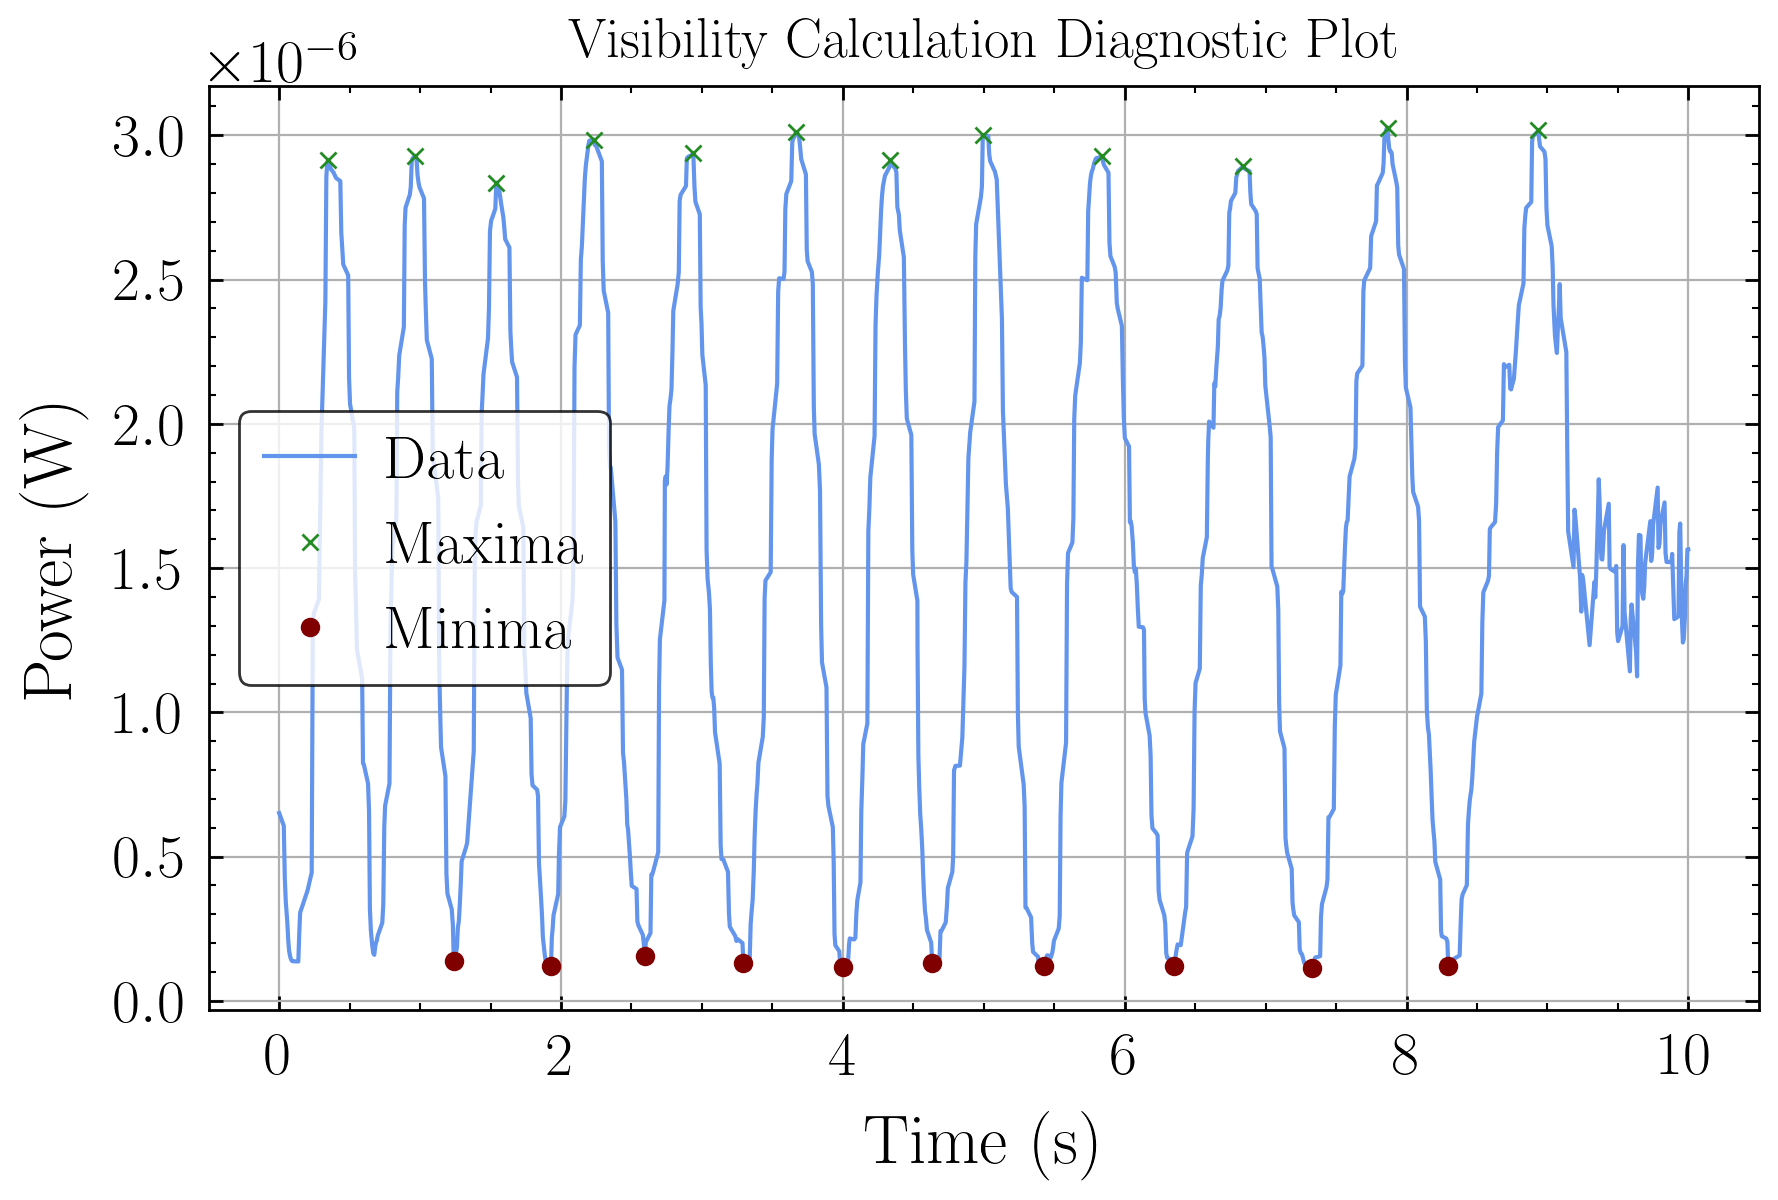

In [22]:
angles_reanalyzed_eraser = [48]
for angle in angles_reanalyzed_eraser:
    vis = VisibilityCalculation(f'../data/classical eraser/{angle}degrees.csv', distance = 44, prominence=0.75e-6)
    vis.run_diagnostic_plot()
    # replace the previous value
    visibilities_eraser[angles.index(angle)] = vis.get_visibility()[0]
    std_visibilities_eraser[angles.index(angle)] = vis.get_visibility()[1]
    

<ErrorbarContainer object of 3 artists>

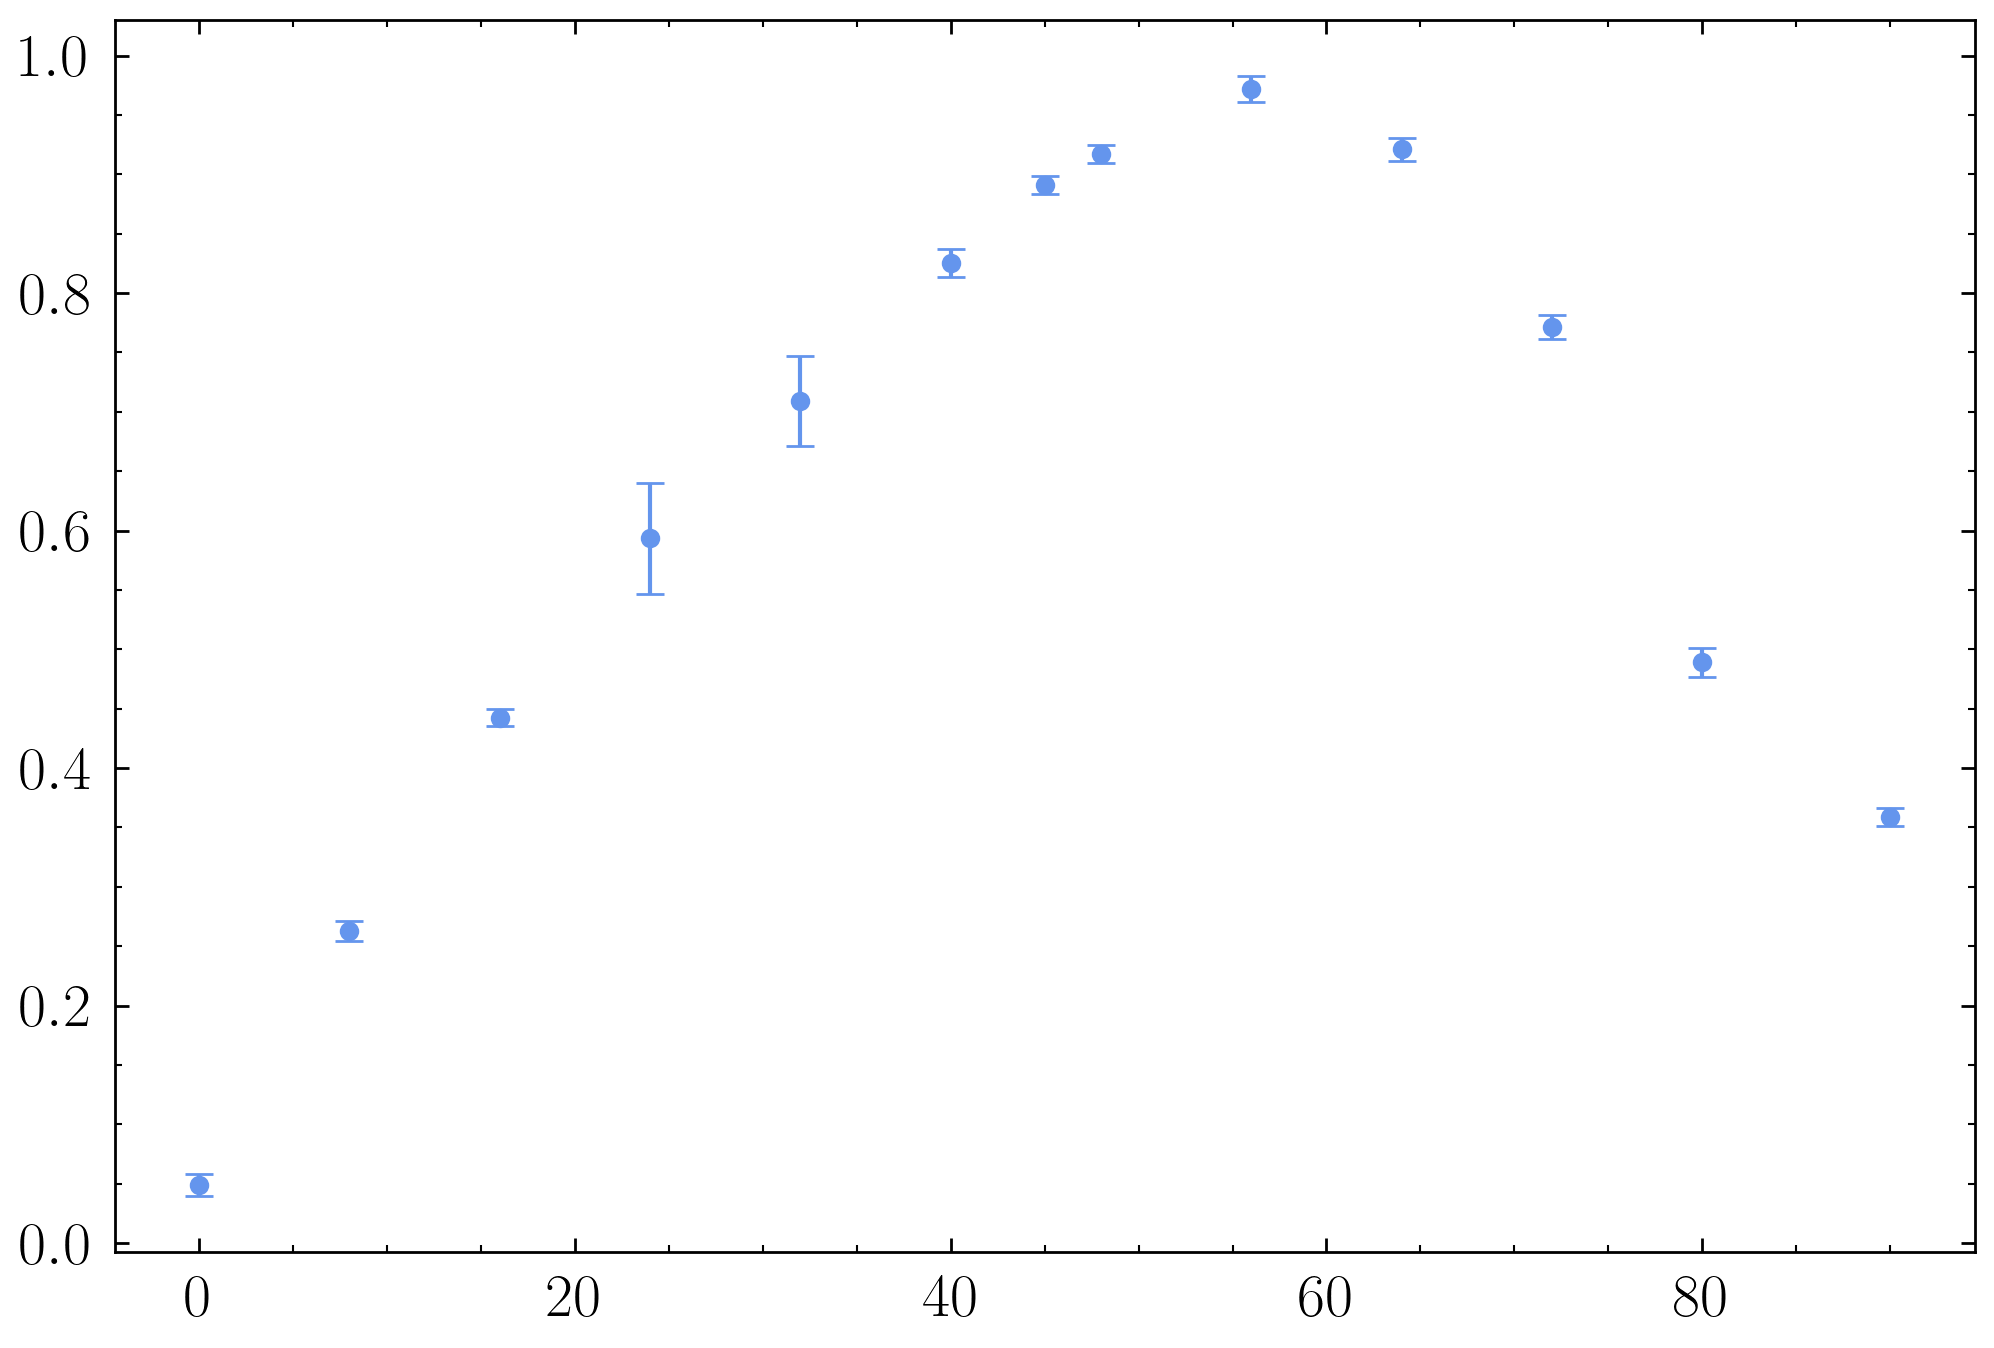

In [23]:
plt.errorbar(angles, visibilities_eraser, yerr=std_visibilities_eraser, fmt='o', capsize=5)